In [1]:
!pip install -U scikit-learn==1.5.2 imbalanced-learn==0.12.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 66.8 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.6 MB/s eta 0:00:0000:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.5.2 which is incompatible.


In [2]:
# Data handling and numerical computations
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/kaggle/input/training-data/HACKATHON_TRAINING_DATA.CSV")

In [4]:
df.head()

,ACCT_AGE,LIMIT,OUTS,ACCT_RESIDUAL_TENURE,LOAN_TENURE,INSTALAMT,SI_FLG,AGE,VINTAGE,KYC_SCR,...,CREDIT_HISTORY_LENGTH1,NO_OF_INQUIRIES1,INCOME_BAND1,AGREG_GROUP,PRODUCT_TYPE,LATEST_CR_DAYS,LATEST_DR_DAYS,TIME_PERIOD,TARGET,UNIQUE_ID
0,1.613,1005500.0,494161.89,0.890,914,38513.0,Y,57.663,18.601,110.0,...,7yrs 6mon,0.0,G,#Total Xpress Credit,PERSONAL LOAN,60.0,45625,NOV24,0,2032
1,1.783,1005500.0,428072.24,0.720,914,38513.0,Y,57.833,18.771,110.0,...,7yrs 6mon,0.0,G,#Total Xpress Credit,PERSONAL LOAN,28.0,45687,JAN25,0,2033
2,1.698,1005500.0,461364.10,0.805,914,38513.0,Y,57.748,18.686,110.0,...,7yrs 6mon,0.0,G,#Total Xpress Credit,PERSONAL LOAN,28.0,45656,DEC24,0,2034
3,9.127,1005500.0,1204287.25,17.878,9862,12736.0,Y,52.302,14.039,110.0,...,10yrs 8mon,1.0,D,#Housing Loan,HOME LOAN,3.0,45625,NOV24,0,2035
4,9.296,1005500.0,1203224.25,17.708,9862,12736.0,Y,52.472,14.209,110.0,...,10yrs 8mon,1.0,D,#Housing Loan,HOME LOAN,2.0,45687,JAN25,0,2036


In [5]:
df.shape

(327741, 139)

In [6]:
print(df.columns.tolist())

['ACCT_AGE', 'LIMIT', 'OUTS', 'ACCT_RESIDUAL_TENURE', 'LOAN_TENURE', 'INSTALAMT', 'SI_FLG', 'AGE', 'VINTAGE', 'KYC_SCR', 'LOCKER_HLDR_IND', 'UID_FLG', 'KYC_FLG', 'INB_FLG', 'EKYC_FLG', 'ONEMNTHCR', 'ONEMNTHSDR', 'ONEMNTHOUTSTANGBAL', 'ONEMNTHAVGMTD', 'ONEMNTHAVGQTD', 'ONEMNTHAVGYTD', 'TWOMNTHSCR', 'TWOMNTHSDR', 'TWOMNTHOUTSTANGBAL', 'TWOMNTHAVGMTD', 'TWOMNTHAVGQTD', 'TWOMNTHAVGYTD', 'THREEMNTHSCR', 'THREEMNTHSDR', 'THREEMNTHOUTSTANGBAL', 'THREEMNTHAVGMTD', 'THREEMNTHAVGQTD', 'THREEMNTHAVGYTD', 'FOURMNTHSCR', 'FOURMNTHSDR', 'FOURMNTHOUTSTANGBAL', 'FOURMNTHAVGMTD', 'FOURMNTHAVGQTD', 'FOURMNTHAVGYTD', 'FIVEMNTHSCR', 'FIVEMNTHSDR', 'FIVEMNTHOUTSTANGBAL', 'FIVEMNTHAVGMTD', 'FIVEMNTHAVGQTD', 'FIVEMNTHAVGYTD', 'SIXMNTHSCR', 'SIXMNTHSDR', 'SIXMNTHOUTSTANGBAL', 'SIXMNTHAVGMTD', 'SIXMNTHAVGQTD', 'SIXMNTHAVGYTD', 'SEVENMNTHSCR', 'SEVENMNTHSDR', 'SEVENMNTHOUTSTANGBAL', 'SEVENMNTHAVGMTD', 'SEVENMNTHAVGQTD', 'SEVENMNTHAVGYTD', 'EIGHTMNTHSCR', 'EIGHTMNTHSDR', 'EIGHTMNTHOUTSTANGBAL', 'EIGHTMNTHAVGMTD'

In [7]:
df.describe()

,ACCT_AGE,LIMIT,OUTS,ACCT_RESIDUAL_TENURE,LOAN_TENURE,INSTALAMT,AGE,VINTAGE,KYC_SCR,ONEMNTHCR,...,PRI_SANCTIONED_AMOUNT1,PRI_DISBURSED_AMOUNT1,PRIMARY_INSTAL_AMT1,NEW_ACCTS_IN_LAST_SIX_MONTHS1,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS1,NO_OF_INQUIRIES1,LATEST_CR_DAYS,LATEST_DR_DAYS,TARGET,UNIQUE_ID
count,327741.000000,3.277410e+05,3.277410e+05,327728.000000,327741.000000,3.277410e+05,327739.000000,327739.000000,327317.000000,3.041660e+05,...,3.212500e+05,3.212500e+05,3.212500e+05,321250.000000,321250.000000,321250.000000,326277.000000,327741.000000,327741.000000,327741.000000
mean,4.637672,9.985971e+05,8.135074e+05,6.445420,4047.234356,1.449439e+04,40.409368,11.761791,114.086222,2.512426e+04,...,2.398679e+06,2.396957e+06,5.890236e+04,0.909933,0.631897,0.384688,49.824082,45656.179620,0.108134,251726.224693
std,3.898602,1.516311e+06,1.480803e+06,7.048248,3097.675869,1.582265e+04,11.393659,4.654792,19.414156,1.377432e+05,...,8.575373e+06,8.587500e+06,2.230916e+05,3.458905,1.496779,1.097248,103.648988,25.288253,0.310550,150253.968649
min,0.164000,1.470000e+04,0.000000e+00,-0.241000,183.000000,0.000000e+00,12.154000,0.222000,11.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,45625.000000,0.000000,1.000000
25%,1.706000,2.655000e+05,1.429155e+05,1.862000,2191.000000,6.541000e+03,31.149000,8.880000,110.000000,0.000000e+00,...,5.488020e+05,5.484052e+05,1.021900e+04,0.000000,0.000000,0.000000,13.000000,45625.000000,0.000000,119409.000000
50%,3.111000,6.655000e+05,4.295673e+05,3.976000,2434.000000,1.137800e+04,39.005000,11.772000,110.000000,9.798000e+01,...,1.165562e+06,1.165363e+06,2.004100e+04,0.000000,0.000000,0.000000,26.000000,45656.000000,0.000000,249616.000000
75%,6.498000,1.177500e+06,9.286602e+05,7.317000,6209.000000,1.894000e+04,48.920000,15.298000,110.000000,2.098657e+04,...,2.496327e+06,2.495000e+06,3.774200e+04,1.000000,1.000000,0.000000,59.000000,45687.000000,0.000000,379607.000000
max,26.454000,1.449055e+08,8.229750e+07,35.613000,13515.000000,1.313011e+06,123.101000,46.955000,440.000000,3.522228e+07,...,1.010685e+09,1.010281e+09,2.081798e+07,200.000000,35.000000,33.000000,2737.000000,45687.000000,1.000000,519434.000000


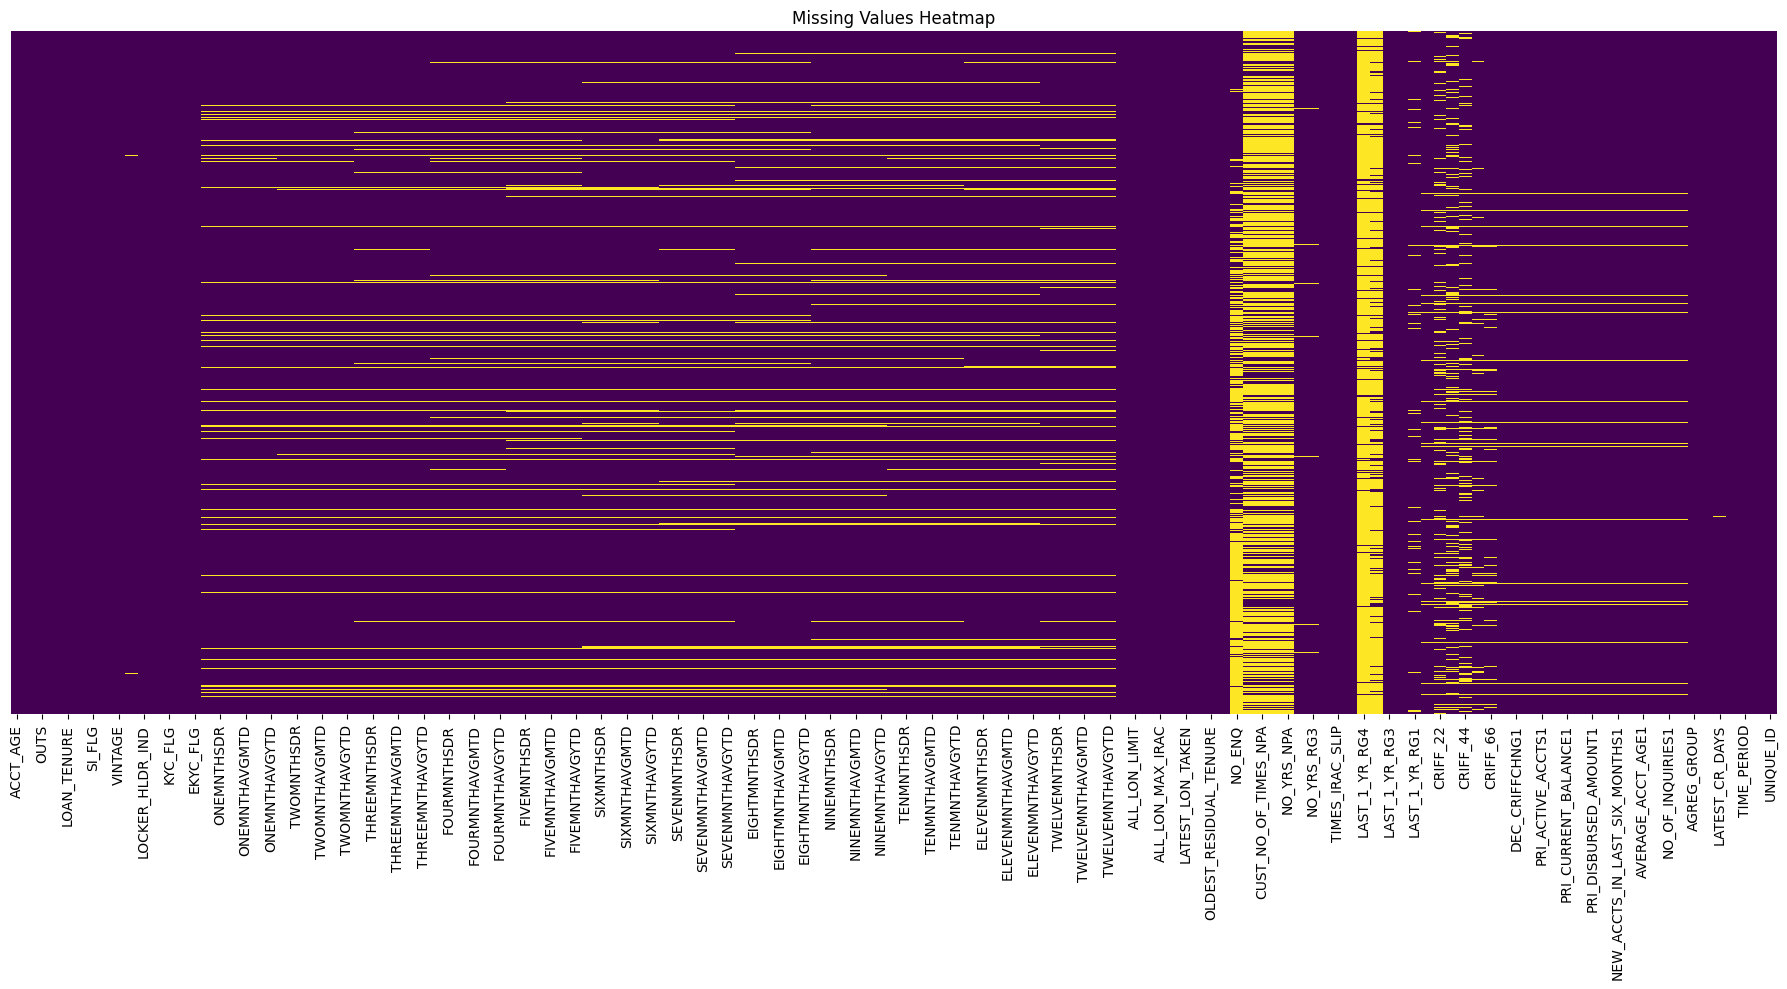

In [8]:
# Plot missing value heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Values Heatmap")
plt.tight_layout()
plt.show()

In [9]:
df["TARGET"].value_counts()

TARGET
0    292301
1     35440
Name: count, dtype: int64

In [10]:
# List of the month-based columns
month_columns = [
    "ONEMNTHCR", "ONEMNTHSDR", "ONEMNTHOUTSTANGBAL", "ONEMNTHAVGMTD", "ONEMNTHAVGQTD", "ONEMNTHAVGYTD",
    "TWOMNTHSCR", "TWOMNTHSDR", "TWOMNTHOUTSTANGBAL", "TWOMNTHAVGMTD", "TWOMNTHAVGQTD", "TWOMNTHAVGYTD",
    "THREEMNTHSCR", "THREEMNTHSDR", "THREEMNTHOUTSTANGBAL", "THREEMNTHAVGMTD", "THREEMNTHAVGQTD", "THREEMNTHAVGYTD",
    "FOURMNTHSCR", "FOURMNTHSDR", "FOURMNTHOUTSTANGBAL", "FOURMNTHAVGMTD", "FOURMNTHAVGQTD", "FOURMNTHAVGYTD",
    "FIVEMNTHSCR", "FIVEMNTHSDR", "FIVEMNTHOUTSTANGBAL", "FIVEMNTHAVGMTD", "FIVEMNTHAVGQTD", "FIVEMNTHAVGYTD",
    "SIXMNTHSCR", "SIXMNTHSDR", "SIXMNTHOUTSTANGBAL", "SIXMNTHAVGMTD", "SIXMNTHAVGQTD", "SIXMNTHAVGYTD",
    "SEVENMNTHSCR", "SEVENMNTHSDR", "SEVENMNTHOUTSTANGBAL", "SEVENMNTHAVGMTD", "SEVENMNTHAVGQTD", "SEVENMNTHAVGYTD",
    "EIGHTMNTHSCR", "EIGHTMNTHSDR", "EIGHTMNTHOUTSTANGBAL", "EIGHTMNTHAVGMTD", "EIGHTMNTHAVGQTD", "EIGHTMNTHAVGYTD",
    "NINEMNTHSCR", "NINEMNTHSDR", "NINEMNTHOUTSTANGBAL", "NINEMNTHAVGMTD", "NINEMNTHAVGQTD", "NINEMNTHAVGYTD",
    "TENMNTHSCR", "TENMNTHSDR", "TENMNTHOUTSTANGBAL", "TENMNTHAVGMTD", "TENMNTHAVGQTD", "TENMNTHAVGYTD",
    "ELEVENMNTHSCR", "ELEVENMNTHSDR", "ELEVENMNTHOUTSTANGBAL", "ELEVENMNTHAVGMTD", "ELEVENMNTHAVGQTD", "ELEVENMNTHAVGYTD",
    "TWELVEMNTHSCR", "TWELVEMNTHSDR", "TWELVEMNTHOUTSTANGBAL", "TWELVEMNTHAVGMTD", "TWELVEMNTHAVGQTD", "TWELVEMNTHAVGYTD"
]
df[month_columns].isnull().sum()


ONEMNTHCR                23575
ONEMNTHSDR               23575
ONEMNTHOUTSTANGBAL       23575
ONEMNTHAVGMTD            23575
ONEMNTHAVGQTD            23575
                         ...  
TWELVEMNTHSDR            29547
TWELVEMNTHOUTSTANGBAL    29547
TWELVEMNTHAVGMTD         29547
TWELVEMNTHAVGQTD         29547
TWELVEMNTHAVGYTD         29547
Length: 72, dtype: int64

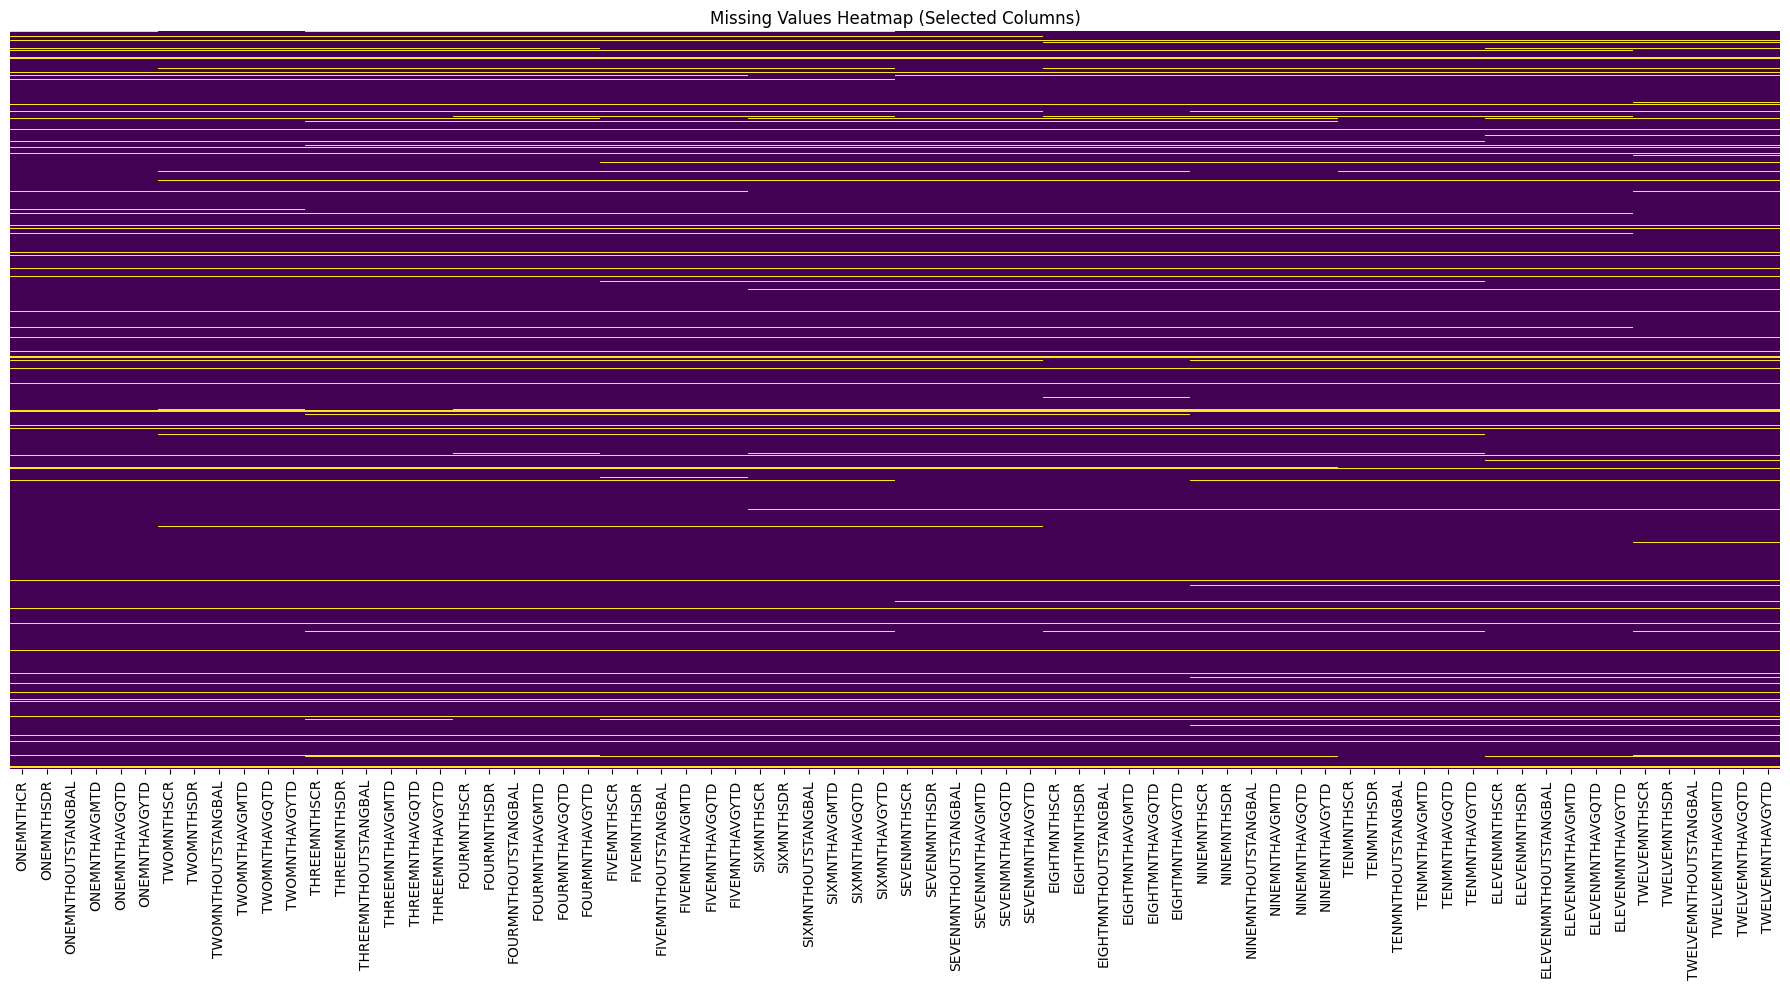

In [11]:
# Plot missing value heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(df[month_columns].isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Values Heatmap (Selected Columns)")
plt.tight_layout()
plt.show()

 ### **Checking and Filtering the NULLS of the month columns**

- **Dropping the rows where all the month columns are NULLs - they carry no information**
- **However, Keeping those rows where the label is FRAUD to prevent minority class data loss**

In [12]:
# Identify rows where all monthly columns are NaN
mask_all_months_null = df[month_columns].isna().all(axis=1)

# Filter those rows
all_months_null_rows = df[mask_all_months_null]

# Check their class distribution
print("Shape of rows with all month columns missing:", all_months_null_rows.shape)
print("\nDistribution of TARGET values:")
print(all_months_null_rows['TARGET'].value_counts(normalize=False))  # absolute count
print("\nPercentage distribution:")
print(all_months_null_rows['TARGET'].value_counts(normalize=True) * 100)  # in %

# Filter only those rows where TARGET == 1 (fraud)
fraud_all_months_null = df[mask_all_months_null & (df['TARGET'] == 1)]

# Count non-nulls per row
fraud_all_months_null = fraud_all_months_null.copy()
fraud_all_months_null['non_null_count'] = fraud_all_months_null.notna().sum(axis=1)

# Summary statistics
print("\nAverage number of non-null columns per fraud row (with all months missing):")
print(fraud_all_months_null['non_null_count'].mean())
print("\nDistribution of non-null counts:")
print(fraud_all_months_null['non_null_count'].describe())

# Compute median of Fraud rows (for monthly columns)
fraud_medians = df[df['TARGET'] == 1][month_columns].median(numeric_only=True)

# Fill the NaNs in monthly columns of fraud rows
fraud_mask = mask_all_months_null & (df['TARGET'] == 1)
df.loc[fraud_mask, month_columns] = df.loc[fraud_mask, month_columns].fillna(fraud_medians)

# Drop remaining rows where all monthly columns are NaN AND not fraud
df = df.drop(df[mask_all_months_null & (df['TARGET'] == 0)].index).reset_index(drop=True)


Shape of rows with all month columns missing: (16844, 139)

Distribution of TARGET values:
TARGET
0    15724
1     1120
Name: count, dtype: int64

Percentage distribution:
TARGET
0    93.350748
1     6.649252
Name: proportion, dtype: float64

Average number of non-null columns per fraud row (with all months missing):
61.958035714285714

Distribution of non-null counts:
count    1120.000000
mean       61.958036
std         4.115733
min        38.000000
25%        60.000000
50%        61.000000
75%        65.000000
max        67.000000
Name: non_null_count, dtype: float64


In [13]:
df[month_columns].isnull().sum()

ONEMNTHCR                 6731
ONEMNTHSDR                6731
ONEMNTHOUTSTANGBAL        6731
ONEMNTHAVGMTD             6731
ONEMNTHAVGQTD             6731
                         ...  
TWELVEMNTHSDR            12703
TWELVEMNTHOUTSTANGBAL    12703
TWELVEMNTHAVGMTD         12703
TWELVEMNTHAVGQTD         12703
TWELVEMNTHAVGYTD         12703
Length: 72, dtype: int64

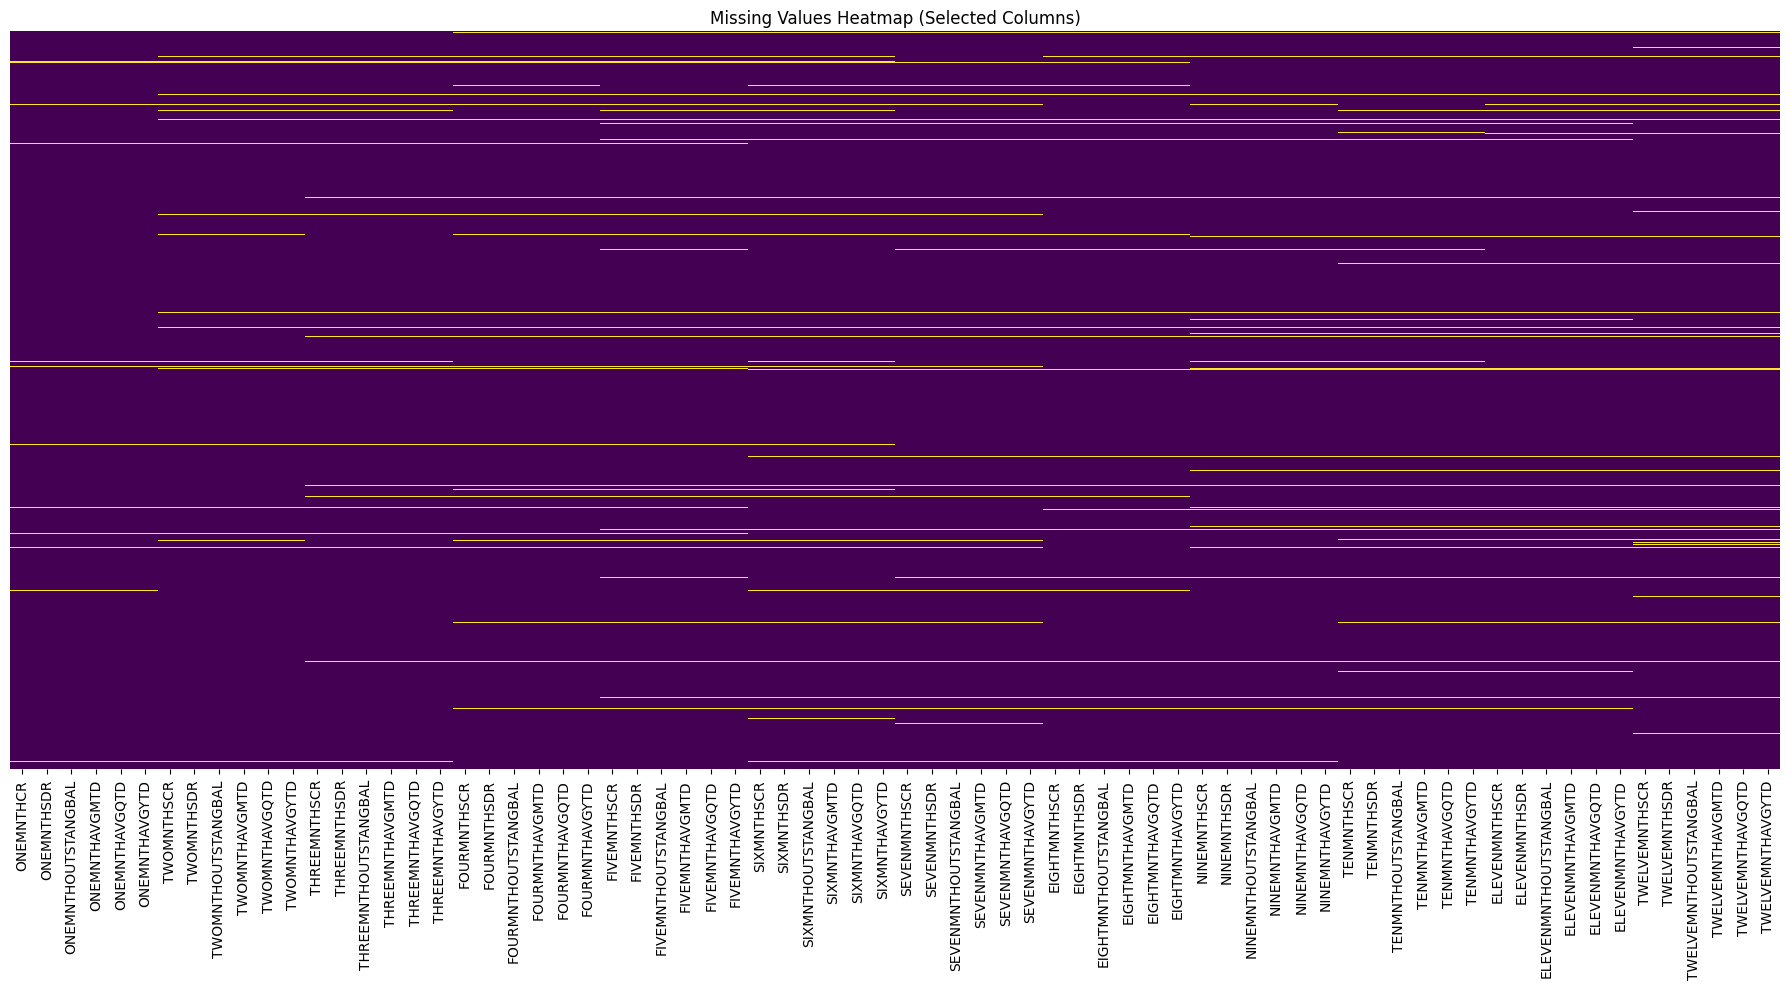

In [14]:
# Plot missing value heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(df[month_columns].isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Values Heatmap (Selected Columns)")
plt.tight_layout()
plt.show()

**Some missing values still remain, that is because we have removed those rows where all the month columns were NULL, some entries are still there where partial month columns are NULL**

In [15]:
df["TARGET"].value_counts()

TARGET
0    276577
1     35440
Name: count, dtype: int64

In [16]:
df.shape

(312017, 139)

### **check whether at least one non-null value exists in each metric’s monthly columns for each row.**

In [17]:
# Define all target types
types = ["CR", "SDR", "OUTSTANGBAL", "YTD"]

# Check non-null presence for each metric
for t in types:
    type_cols = [col for col in month_columns if col.endswith(t)]

    # Mask: True if row has at least one non-null value among that metric’s months
    has_value_mask = df[type_cols].notna().any(axis=1)

    # Print summary
    print(f"=== {t} ===")
    print(f"Rows with at least one non-null value: {has_value_mask.sum()}")
    print(f"Rows with all 12 months missing: {(~has_value_mask).sum()}")
    print("-" * 50)

=== CR ===
Rows with at least one non-null value: 312017
Rows with all 12 months missing: 0
--------------------------------------------------
=== SDR ===
Rows with at least one non-null value: 312017
Rows with all 12 months missing: 0
--------------------------------------------------
=== OUTSTANGBAL ===
Rows with at least one non-null value: 312017
Rows with all 12 months missing: 0
--------------------------------------------------
=== YTD ===
Rows with at least one non-null value: 312017
Rows with all 12 months missing: 0
--------------------------------------------------


### **Taking the `mean`, `std deviation`, `min`, `max` of each type over 12 months**

In [18]:
# Define all target types
types = ["CR", "SDR", "OUTSTANGBAL", "YTD"]

# Loop and compute statistics for each type
for t in types:
    # Select matching columns
    type_cols = [col for col in month_columns if col.endswith(t)]
    
    # Compute row-wise stats ignoring NaNs
    df[f'{t}_MEAN'] = df[type_cols].mean(axis=1, skipna=True)
    df[f'{t}_STD'] = df[type_cols].std(axis=1, skipna=True)
    df[f'{t}_MIN'] = df[type_cols].min(axis=1, skipna=True)
    df[f'{t}_MAX'] = df[type_cols].max(axis=1, skipna=True)

In [19]:
df.shape

(312017, 155)

**Correlation matrix of the newly created columns**

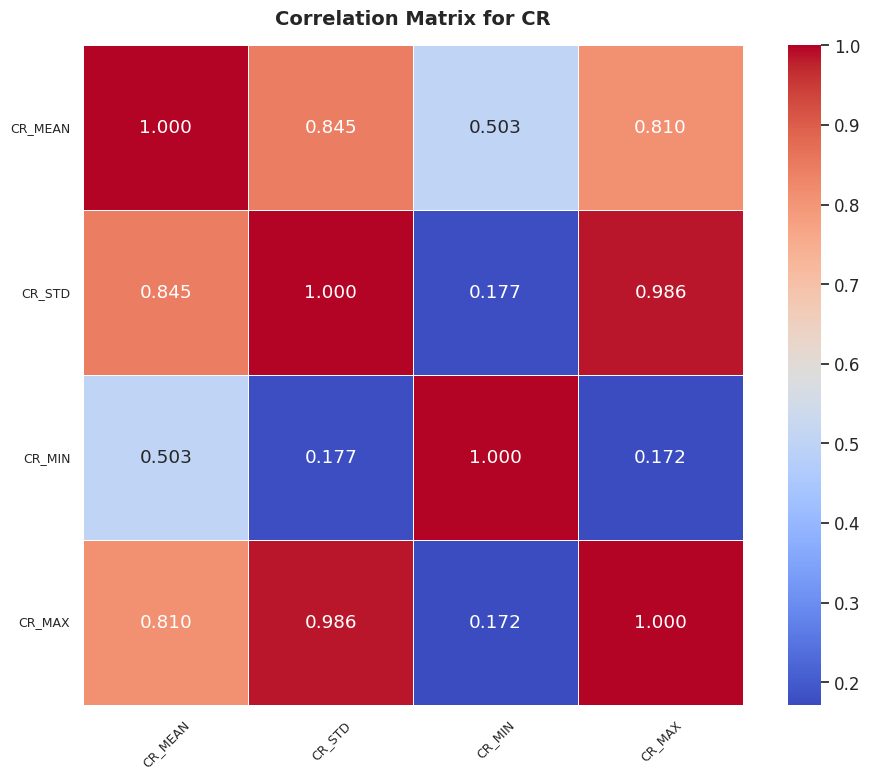

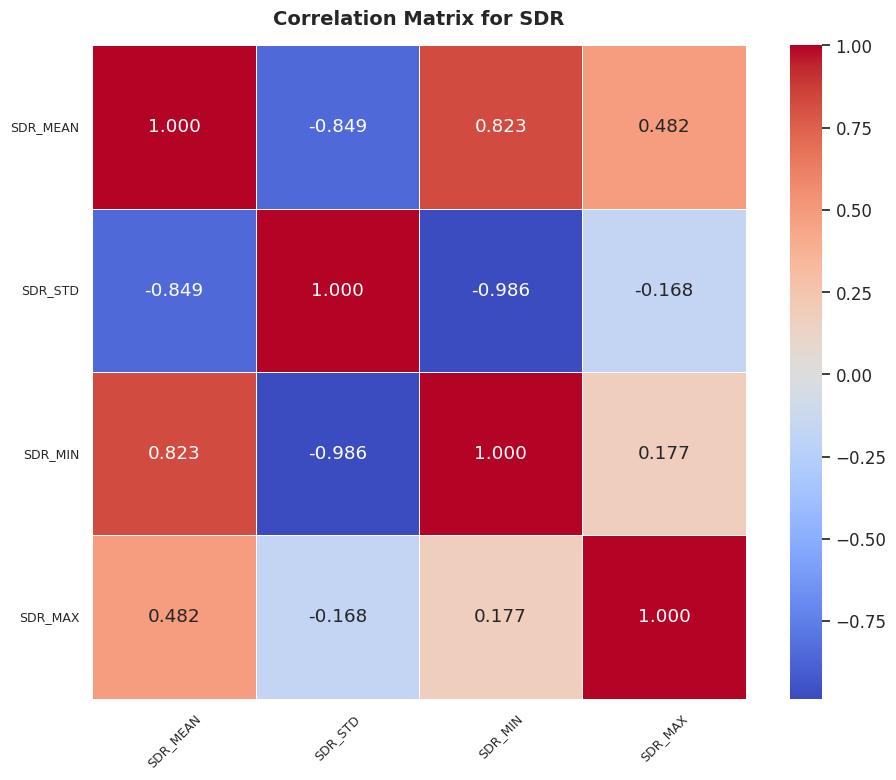

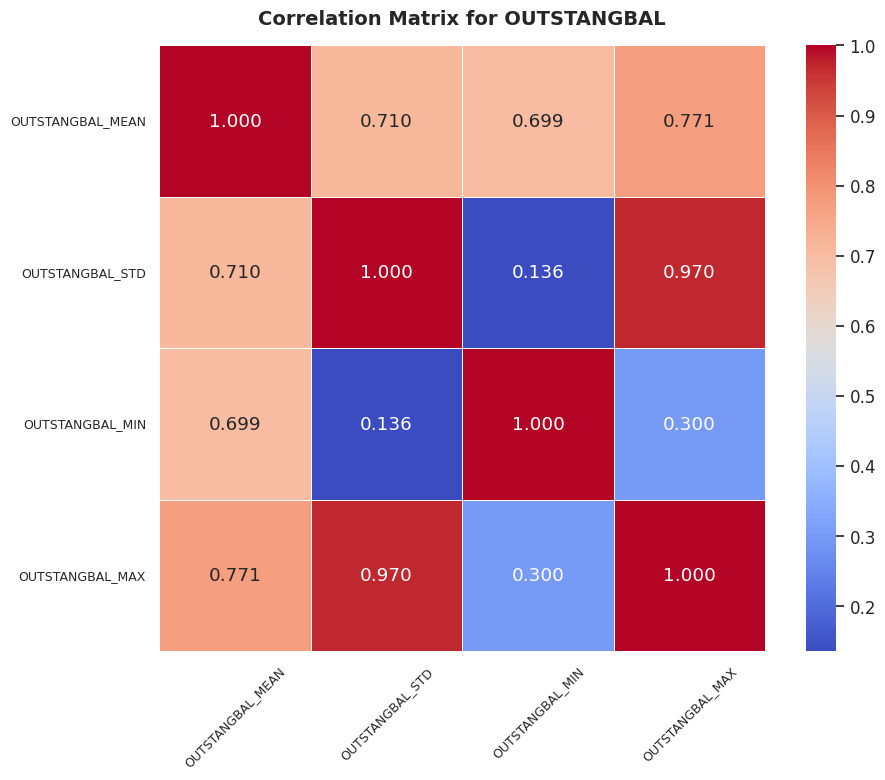

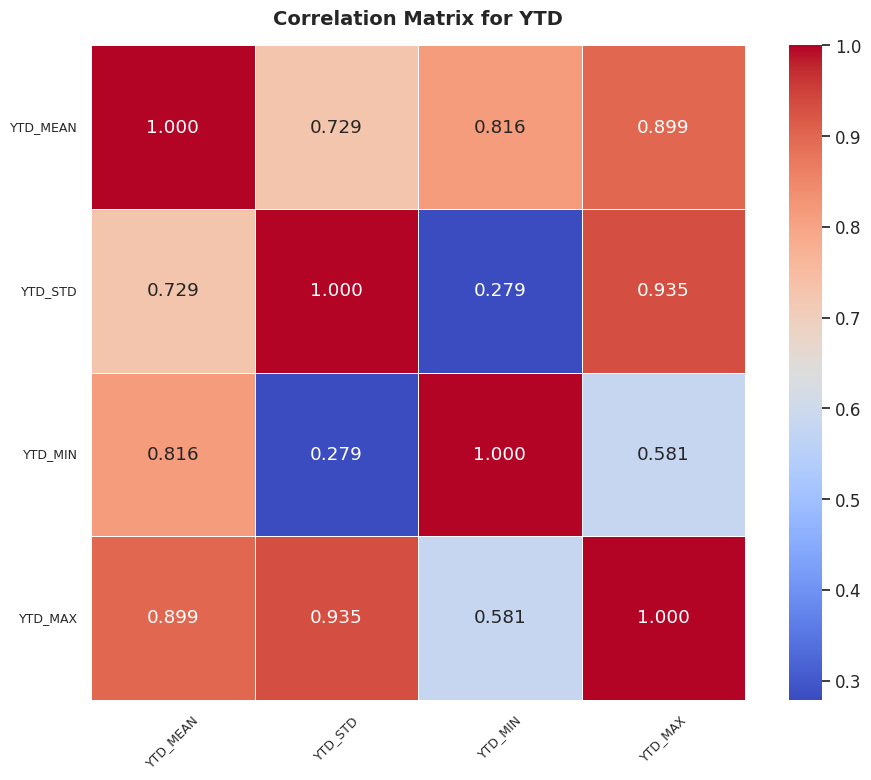

In [20]:
    # Define metric types
    types = ["CR", "SDR", "OUTSTANGBAL", "YTD"]
    
    # Style settings
    sns.set_theme(style="whitegrid", font_scale=1.1)
    
    # Loop through each type and visualize correlation matrix
    for t in types:
        cols = [f"{t}_MEAN", f"{t}_STD", f"{t}_MIN", f"{t}_MAX"]
        
        # Keep only existing columns (in case some are missing)
        existing_cols = [c for c in cols if c in df.columns]
        
        if len(existing_cols) >= 2:
            corr_matrix = df[existing_cols].corr()
            
            # Create figure
            plt.figure(figsize=(10, 8))
            sns.heatmap(
                corr_matrix, 
                annot=True, 
                cmap="coolwarm", 
                fmt=".3f", 
                linewidths=0.6, 
                cbar=True, 
                square=True
            )

            # Reduce tick label size
            plt.xticks(fontsize=9, rotation=45)
            plt.yticks(fontsize=9, rotation=0)
            
            plt.title(f"Correlation Matrix for {t}", fontsize=14, pad=15, fontweight='bold')
            plt.tight_layout()
            plt.show()
        else:
            print(f"Not enough columns found for type: {t}")

In [21]:
corr_threshold = 0.90
to_drop = []

for t in types:
    cols = [f"{t}_MEAN", f"{t}_STD", f"{t}_MIN", f"{t}_MAX"]
    existing_cols = [c for c in cols if c in df.columns]
    
    if len(existing_cols) >= 2:
        corr_matrix = df[existing_cols].corr().abs()
        upper_triangle = corr_matrix.where(
            np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
        )
        drop_cols = [column for column in upper_triangle.columns if any(upper_triangle[column] > corr_threshold)]
        to_drop.extend(drop_cols)

print("\nHighly correlated derived columns to drop:")
print(to_drop)


Highly correlated derived columns to drop:
['CR_MAX', 'SDR_MIN', 'OUTSTANGBAL_MAX', 'YTD_MAX']


- **CR_STD and CR_MAX are almost identical - Drop CR_STD (since CR_MAX may capture upper trend better)**
- **SDR_STD and SDR_MIN are redundant (inverse relationship). Drop SDR_STD (we’ll keep SDR_MIN and SDR_MAX)**
- **OUTSTANGBAL_STD and OUTSTANGBAL_MAX show max correlation. Drop OUTSTANGBAL_STD (keep MAX to capture range behavior)**
- **YTD_STD and YTD_MAX show similar behaviour. Drop: YTD_STD**

In [22]:
drop_cols = [
    'CR_STD', 
    'SDR_STD',
    'OUTSTANGBAL_STD', 
    'YTD_STD'
]

df.drop(columns=drop_cols, inplace=True)
df.shape

(312017, 151)

### **Trend / Slope feature: Compute the direction of change over time**

- **Positive slope → increasing trend over months**
- **Negative slope → decreasing trend over months**
- **Near 0 → stable/no clear trend**

In [23]:
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Define all target types
types = ["CR", "SDR", "OUTSTANGBAL", "YTD"]

# Define helper to compute slope row-wise in a vectorized way
def compute_trend_vectorized(df, cols):
    """
    Efficiently compute slope (trend) per row across given monthly columns.
    Handles NaNs and non-numeric values automatically.
    """
    data = df[cols].apply(pd.to_numeric, errors='coerce').to_numpy()
    x = np.arange(data.shape[1])  # e.g., [0, 1, 2, 3, ..., n_months-1]

    # Mask NaNs
    mask = ~np.isnan(data)

    # Compute mean-adjusted X and Y for regression formula
    x_mean = np.nanmean(np.where(mask, x, np.nan), axis=1)
    y_mean = np.nanmean(data, axis=1)

    # Compute numerator and denominator separately (like covariance/variance)
    num = np.nansum((np.where(mask, x, np.nan) - x_mean[:, None]) *
                    (data - y_mean[:, None]), axis=1)
    den = np.nansum((np.where(mask, x, np.nan) - x_mean[:, None]) ** 2, axis=1)

    # Avoid division by zero
    slope = np.divide(num, den, out=np.full_like(num, np.nan), where=den != 0)
    return slope


# Compute trend columns efficiently
for t in types:
    type_cols = [col for col in month_columns if col.endswith(t)]
    if len(type_cols) == 0:
        print(f"No columns found for {t}")
        continue

    df[f"{t}_TREND"] = compute_trend_vectorized(df, type_cols)
    print(f"{t}_TREND computed from {len(type_cols)} columns")


CR_TREND computed from 12 columns
SDR_TREND computed from 12 columns
OUTSTANGBAL_TREND computed from 12 columns
YTD_TREND computed from 12 columns


**Checking for `NULL` in the derived trend columns**

In [24]:
trend_cols = ["CR_TREND", "SDR_TREND", "OUTSTANGBAL_TREND", "YTD_TREND"]

df[trend_cols].isnull().sum()

CR_TREND             2044
SDR_TREND            2044
OUTSTANGBAL_TREND    2044
YTD_TREND            2044
dtype: int64

In [25]:
# Define all target types
types = ["CR", "SDR", "OUTSTANGBAL", "YTD"]

# Check non-null presence for each metric
for t in types:
    type_cols = [col for col in month_columns if col.endswith(t)]

    # Mask: True if row has at least 2 non-null values among that metric’s months
    has_value_mask = df[type_cols].notna().sum(axis=1) >= 2

    # Print summary
    print(f"=== {t} ===")
    print(f"Rows with at least 2 non-null values: {has_value_mask.sum()}")
    print(f"Rows with fewer than 2 non-null values: {(~has_value_mask).sum()}")
    print("-" * 50)

=== CR ===
Rows with at least 2 non-null values: 309973
Rows with fewer than 2 non-null values: 2044
--------------------------------------------------
=== SDR ===
Rows with at least 2 non-null values: 309973
Rows with fewer than 2 non-null values: 2044
--------------------------------------------------
=== OUTSTANGBAL ===
Rows with at least 2 non-null values: 309973
Rows with fewer than 2 non-null values: 2044
--------------------------------------------------
=== YTD ===
Rows with at least 2 non-null values: 309973
Rows with fewer than 2 non-null values: 2044
--------------------------------------------------


In [26]:
# printing and checking some rows
null_rows = df[df["CR_TREND"].isnull()][month_columns + ["TARGET"]]
null_rows.head()

,ONEMNTHCR,ONEMNTHSDR,ONEMNTHOUTSTANGBAL,ONEMNTHAVGMTD,ONEMNTHAVGQTD,ONEMNTHAVGYTD,TWOMNTHSCR,TWOMNTHSDR,TWOMNTHOUTSTANGBAL,TWOMNTHAVGMTD,...,ELEVENMNTHAVGMTD,ELEVENMNTHAVGQTD,ELEVENMNTHAVGYTD,TWELVEMNTHSCR,TWELVEMNTHSDR,TWELVEMNTHOUTSTANGBAL,TWELVEMNTHAVGMTD,TWELVEMNTHAVGQTD,TWELVEMNTHAVGYTD,TARGET
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


**Imputing missing values with 0**

In [27]:
for t in types:
    df[f"{t}_TREND"].fillna(0, inplace=True)

df[trend_cols].isnull().sum()

CR_TREND             0
SDR_TREND            0
OUTSTANGBAL_TREND    0
YTD_TREND            0
dtype: int64

### **Creating CR & SDR Non Null Count column**

- **This counts how many valid months of CR (credits) and SDR (debits) data exist per row.**
- **It measures data completeness for each entity or record.**
- **That’s a useful quality/coverage indicator — sometimes fraud or anomalies correlate with missingness patterns (e.g., incomplete financial records).**

In [28]:
# Define column groups
cr_cols = [col for col in month_columns if col.endswith("CR")]
sdr_cols = [col for col in month_columns if col.endswith("SDR")]

# Compute non-null counts
df['CR_non_null_count'] = df[cr_cols].notnull().sum(axis=1)
df['SDR_non_null_count'] = df[sdr_cols].notnull().sum(axis=1)

df[['CR_non_null_count', 'SDR_non_null_count']].describe()

,CR_non_null_count,SDR_non_null_count
count,312017.000000,312017.000000
mean,11.529933,11.529933
std,1.825761,1.825761
min,1.000000,1.000000
25%,12.000000,12.000000
50%,12.000000,12.000000
75%,12.000000,12.000000
max,12.000000,12.000000


In [29]:
df.shape

(312017, 157)

In [30]:
df.shape
df["TARGET"].value_counts()

TARGET
0    276577
1     35440
Name: count, dtype: int64

In [31]:
df.head()

,ACCT_AGE,LIMIT,OUTS,ACCT_RESIDUAL_TENURE,LOAN_TENURE,INSTALAMT,SI_FLG,AGE,VINTAGE,KYC_SCR,...,OUTSTANGBAL_MAX,YTD_MEAN,YTD_MIN,YTD_MAX,CR_TREND,SDR_TREND,OUTSTANGBAL_TREND,YTD_TREND,CR_non_null_count,SDR_non_null_count
0,1.613,1005500.0,494161.89,0.890,914,38513.0,Y,57.663,18.601,110.0,...,147.22,21322.283800,2531.787,29426.483,-242.600000,213.000000,10.400000,5730.963500,5,5
1,1.783,1005500.0,428072.24,0.720,914,38513.0,Y,57.833,18.771,110.0,...,287.22,-20078.143800,-79624.206,24788.878,-6154.133574,4568.545126,-19.158845,9656.878455,5,5
2,1.698,1005500.0,461364.10,0.805,914,38513.0,Y,57.748,18.686,110.0,...,287.22,-487.854000,-79624.206,26692.257,-622.461140,-2709.295337,-19.772021,10218.192759,5,5
3,9.127,1005500.0,1204287.25,17.878,9862,12736.0,Y,52.302,14.039,110.0,...,518.97,152.266250,51.970,373.317,3.000420,-13.135909,17.905594,34.305983,12,12
4,9.296,1005500.0,1203224.25,17.708,9862,12736.0,Y,52.472,14.209,110.0,...,51.97,98.800333,51.970,345.412,1.622832,0.000000,-0.038462,19.736224,12,12


### **Dropping the original month columns as all relevant info from them have been extracted**

In [32]:
df.drop(columns = month_columns, inplace = True)
df.head()

,ACCT_AGE,LIMIT,OUTS,ACCT_RESIDUAL_TENURE,LOAN_TENURE,INSTALAMT,SI_FLG,AGE,VINTAGE,KYC_SCR,...,OUTSTANGBAL_MAX,YTD_MEAN,YTD_MIN,YTD_MAX,CR_TREND,SDR_TREND,OUTSTANGBAL_TREND,YTD_TREND,CR_non_null_count,SDR_non_null_count
0,1.613,1005500.0,494161.89,0.890,914,38513.0,Y,57.663,18.601,110.0,...,147.22,21322.283800,2531.787,29426.483,-242.600000,213.000000,10.400000,5730.963500,5,5
1,1.783,1005500.0,428072.24,0.720,914,38513.0,Y,57.833,18.771,110.0,...,287.22,-20078.143800,-79624.206,24788.878,-6154.133574,4568.545126,-19.158845,9656.878455,5,5
2,1.698,1005500.0,461364.10,0.805,914,38513.0,Y,57.748,18.686,110.0,...,287.22,-487.854000,-79624.206,26692.257,-622.461140,-2709.295337,-19.772021,10218.192759,5,5
3,9.127,1005500.0,1204287.25,17.878,9862,12736.0,Y,52.302,14.039,110.0,...,518.97,152.266250,51.970,373.317,3.000420,-13.135909,17.905594,34.305983,12,12
4,9.296,1005500.0,1203224.25,17.708,9862,12736.0,Y,52.472,14.209,110.0,...,51.97,98.800333,51.970,345.412,1.622832,0.000000,-0.038462,19.736224,12,12


In [33]:
# Compute correlation
corr_value = df[['CR_non_null_count', 'SDR_non_null_count']].corr().iloc[0, 1]
print(f"Correlation between CR_non_null_count and SDR_non_null_count: {corr_value:.4f}")

# Count rows where the two are different
diff_count = (df['CR_non_null_count'] != df['SDR_non_null_count']).sum()
total_rows = len(df)
diff_percent = (diff_count / total_rows) * 100

print(f"Rows where counts differ: {diff_count} ({diff_percent:.2f}% of total)")

Correlation between CR_non_null_count and SDR_non_null_count: 1.0000
Rows where counts differ: 0 (0.00% of total)


**Dropping `SDR_non_null_count` because corr between CR and SDR non null count is 1**

In [34]:
df.drop(columns = ['SDR_non_null_count'], inplace = True)

In [35]:
df.shape

(312017, 84)

**Checking Missing Values**

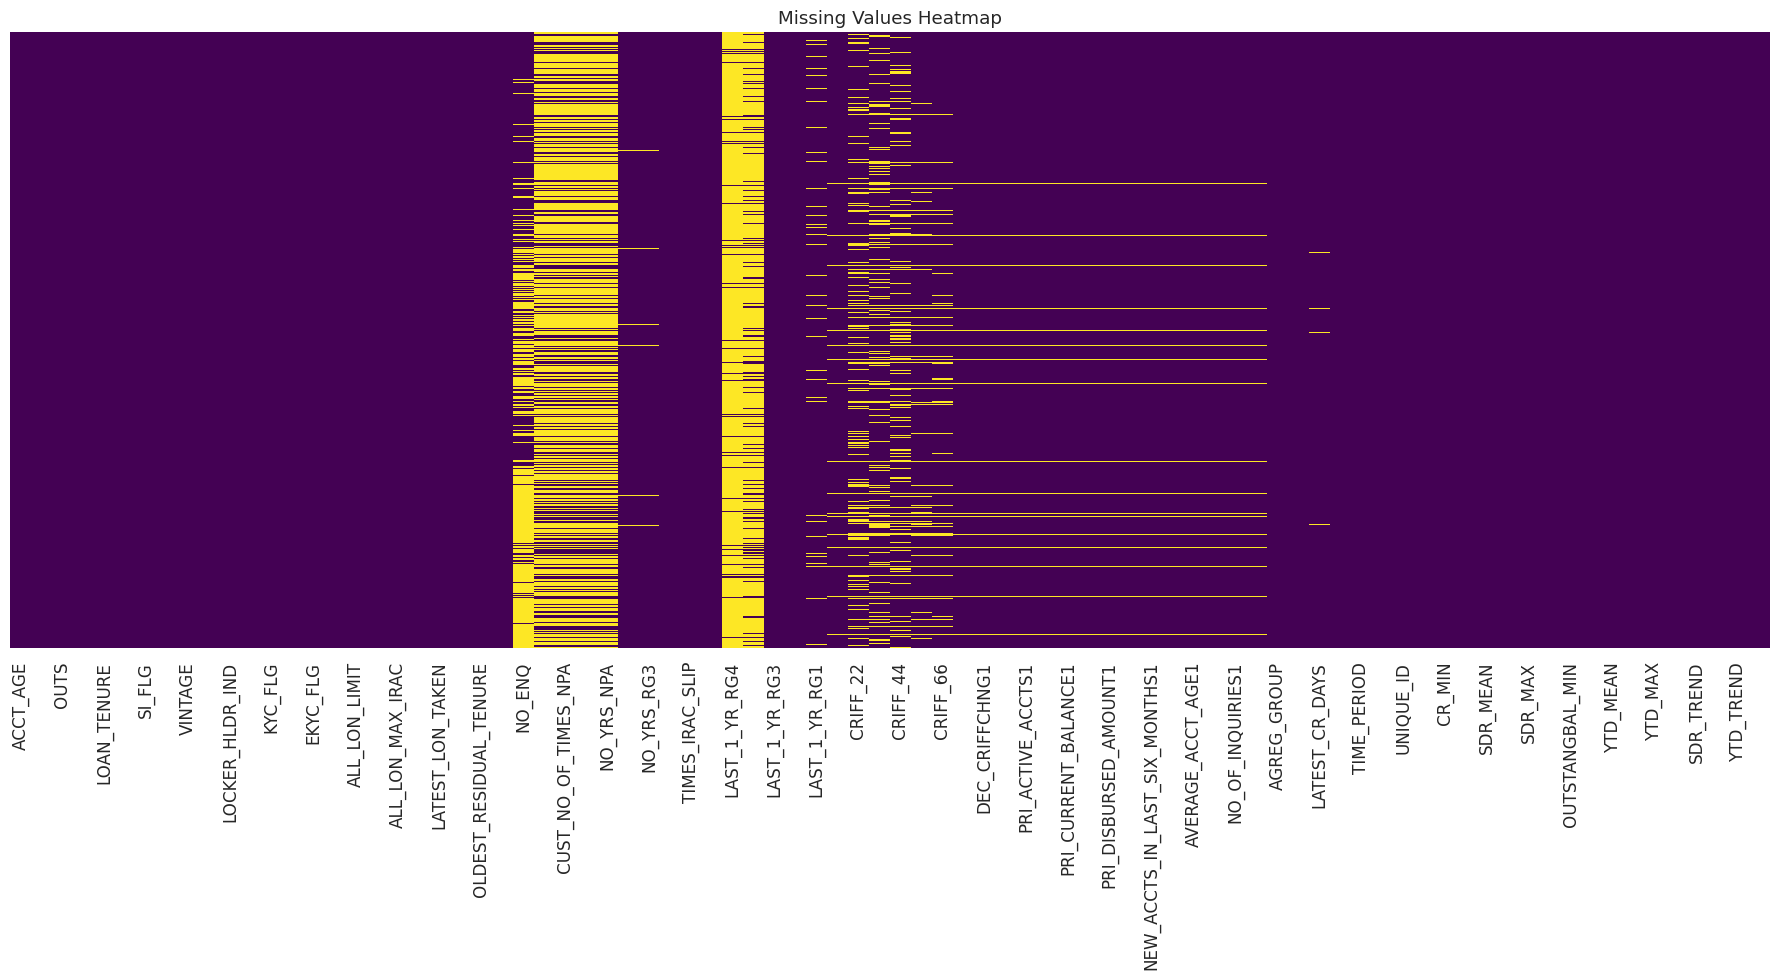

In [36]:
# Plot missing value heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Values Heatmap")
plt.tight_layout()
plt.show()

### **Columns with majority missing values**

In [37]:
# Calculate missing percentage for all columns
missing_percent = (df.isnull().sum() / len(df)) * 100

# Convert to DataFrame for readability (optional)
missing_df = missing_percent.reset_index()
missing_df.columns = ['Column', 'Missing_Percentage']

# Filter columns with more than 90% missing values
high_missing = missing_df[missing_df['Missing_Percentage'] > 50]

print(f"Columns with >50% missing values: {len(high_missing)}")
display(high_missing)

Columns with >50% missing values: 7


,Column,Missing_Percentage
24,NO_ENQ,50.954916
25,FIRST_NPA_TENURE,66.745081
26,CUST_NO_OF_TIMES_NPA,66.745081
27,LATEST_NPA_TENURE,66.745081
28,NO_YRS_NPA,66.745081
34,LAST_1_YR_RG4,92.591109
35,LAST_3_YR_RG4,82.048735


In [38]:
columns_to_drop = [
    "NO_ENQ", "FIRST_NPA_TENURE", "CUST_NO_OF_TIMES_NPA", "LATEST_NPA_TENURE",
    "NO_YRS_NPA", "LAST_1_YR_RG4", "LAST_3_YR_RG4"
]

df.drop(columns=columns_to_drop, inplace=True)
# more than 50% missing values - also they do not carry much relevance in fraud detection

**Create a ratio feature: LIMIT_UTILIZATION = how much of the loan limit has been used.**

In [39]:
df['LIMIT_UTILIZATION'] = df['ALL_LON_OUTS'] / df['ALL_LON_LIMIT'].replace(0, 1)
df.drop(columns = ["ALL_LON_OUTS", "ALL_LON_LIMIT"], inplace=True)

**Prioritize LATEST_RESIDUAL_TENURE because it reflects the most recent and actionable debt load, which is more directly tied to current financial stress.**

In [40]:
df.drop(columns = ["OLDEST_LON_TAKEN"], inplace=True)

**latest residual tenure and oldest residual tenure is considered, so dropping Latest Loan Taken (redundant now)**

In [41]:
df.drop(columns = ["LATEST_LON_TAKEN"], inplace=True)

- **TIMES_IRAC_UPR = Number of times the account’s risk grade improved (moved up).**
- **TIMES_IRAC_SLIP = Number of times the risk grade worsened (slipped down).**
- **RG_UP_DOWN_SCORE = (number of improvements) – (number of slips)**

**It captures directional risk behavior:**
- *Positive score → customer’s creditworthiness has improved.*
- *Negative score → customer has deteriorated.*
- *Around zero → stable or balanced.*

In [42]:
df["RG_UP_DOWN_SCORE"] = df["TIMES_IRAC_UPR"] - df["TIMES_IRAC_SLIP"]
df.drop(columns = ["TIMES_IRAC_UPR", "TIMES_IRAC_SLIP"], inplace=True)

**It creates a single, powerful feature summarizing the customer’s worst recent risk condition, which tends to be more predictive of default than averages or minimums or separate risk conditions.**

In [43]:
# Create RECENT_RISK_GRADE feature
df['RECENT_RISK_GRADE'] = df[['LAST_1_YR_RG1', 'LAST_1_YR_RG2', 'LAST_1_YR_RG3']].max(axis=1)

# Drop the original columns
df.drop(columns=['LAST_1_YR_RG1', 'LAST_1_YR_RG2', 'LAST_1_YR_RG3'], inplace=True)

**This column (TOT_IRAC_CHNG) represents the total number of IRAC changes (risk grade movements), already captured by RG_UP_DOWN_SCORE**

In [44]:
df.drop(columns = ["TOT_IRAC_CHNG"], inplace=True)

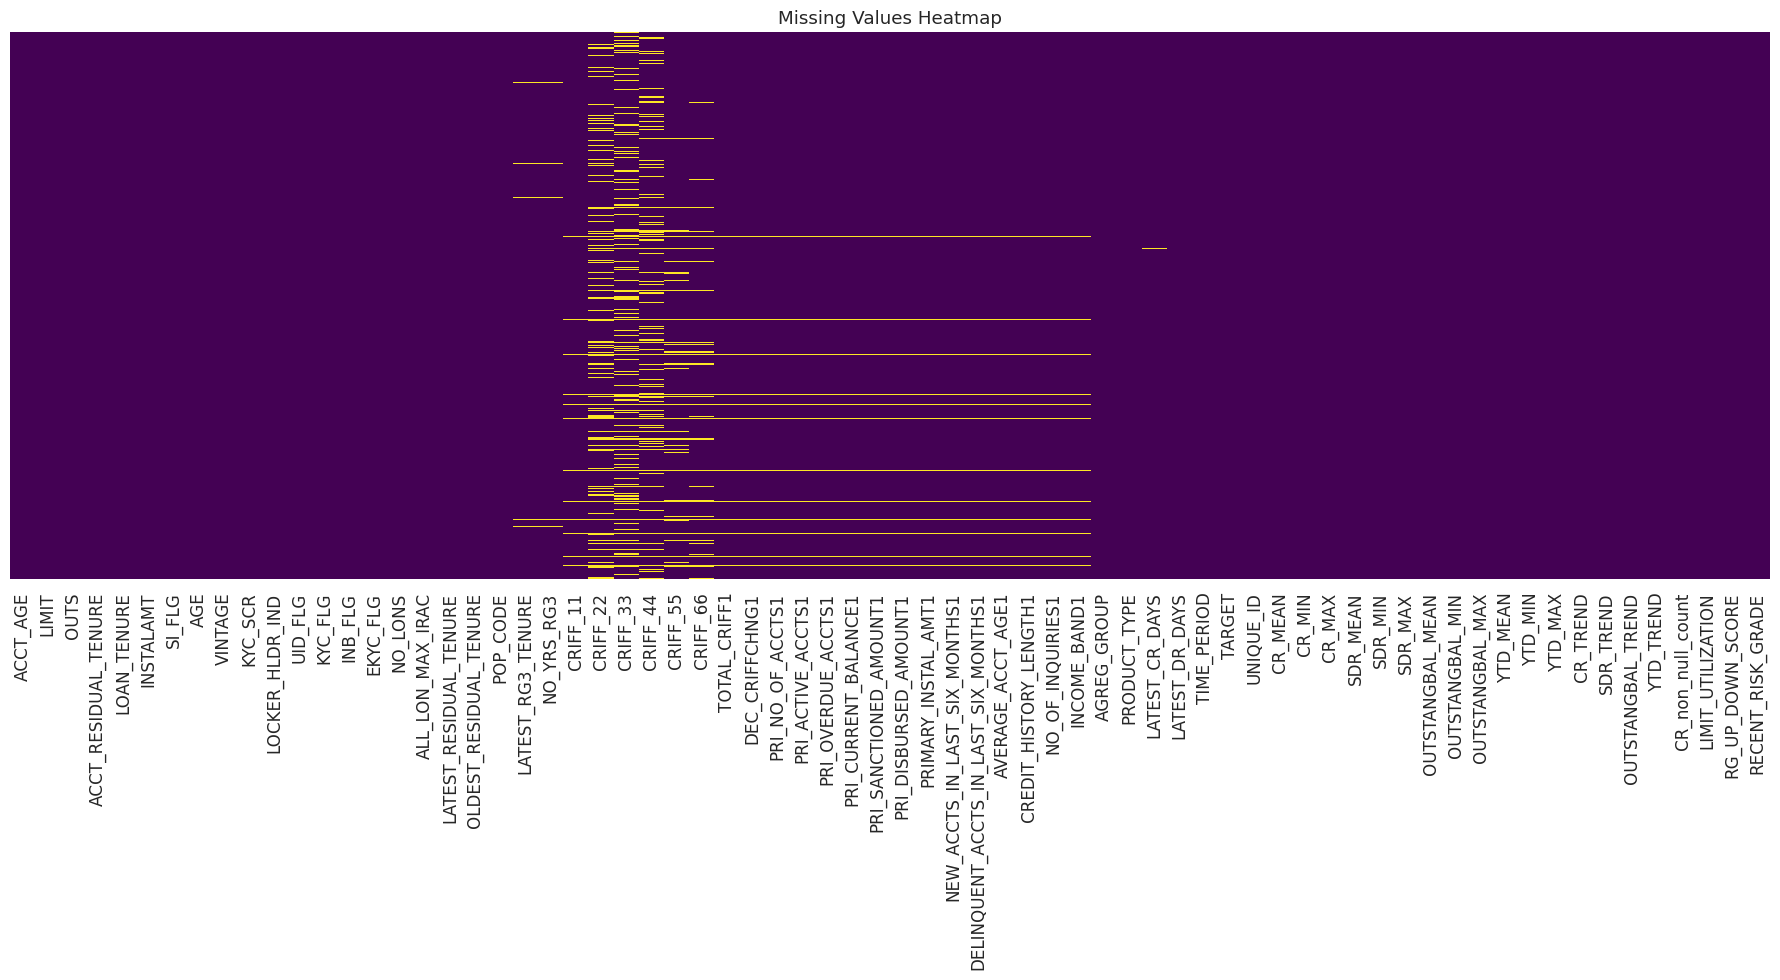

In [45]:
# Plot missing value heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Values Heatmap")
plt.tight_layout()
plt.show()

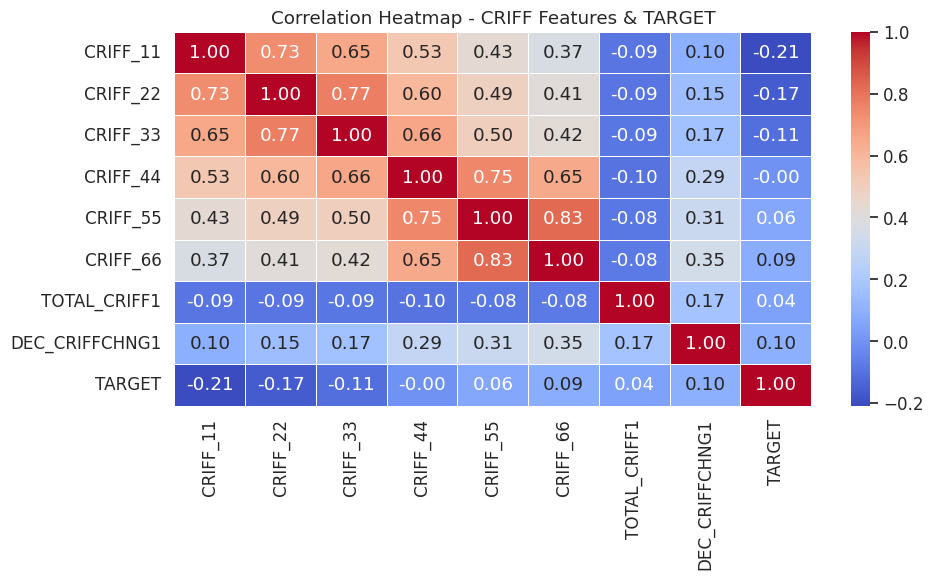

In [46]:
# Select the columns
criff_cols = [
    'CRIFF_11', 'CRIFF_22', 'CRIFF_33', 'CRIFF_44', 'CRIFF_55', 'CRIFF_66',
    'TOTAL_CRIFF1', 'DEC_CRIFFCHNG1', 'TARGET'
]

# Compute the correlation matrix
corr_matrix = df[criff_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap - CRIFF Features & TARGET")
plt.tight_layout()
plt.show()


In [47]:
df.drop(columns = ["CRIFF_11", "CRIFF_22", "CRIFF_33", "CRIFF_44", "CRIFF_55", "CRIFF_66"], inplace=True)

<Figure size 800x500 with 0 Axes>

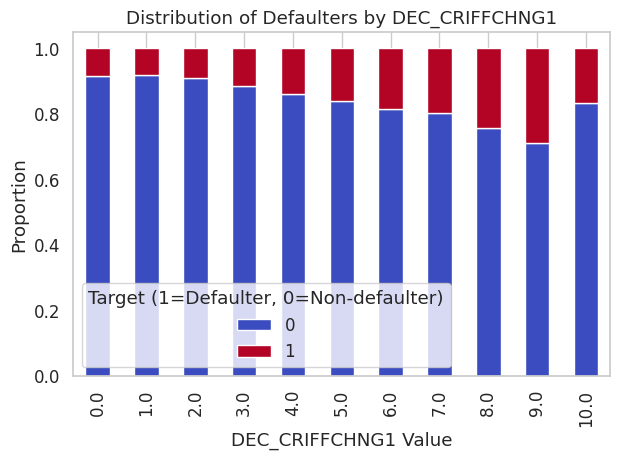

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df
# And 'DEC_CRIFFCHNG1' is the feature
# 'target' is the column with 1 = defaulters, 0 = non-defaulters

# Create a crosstab of DEC_CRIFFCHNG1 vs target
dist_table = pd.crosstab(df['DEC_CRIFFCHNG1'], df['TARGET'], normalize='index')

# Plotting the distribution
plt.figure(figsize=(8, 5))
dist_table.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Distribution of Defaulters by DEC_CRIFFCHNG1')
plt.xlabel('DEC_CRIFFCHNG1 Value')
plt.ylabel('Proportion')
plt.legend(title='Target (1=Defaulter, 0=Non-defaulter)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



In [49]:
df["DEC_CRIFFCHNG1"].value_counts()
# therefore keeping dec_criffchng1


DEC_CRIFFCHNG1
3.0     58943
0.0     55717
4.0     52281
2.0     50630
1.0     38128
5.0     32774
6.0     13539
7.0      3513
8.0       532
9.0        38
10.0        6
Name: count, dtype: int64

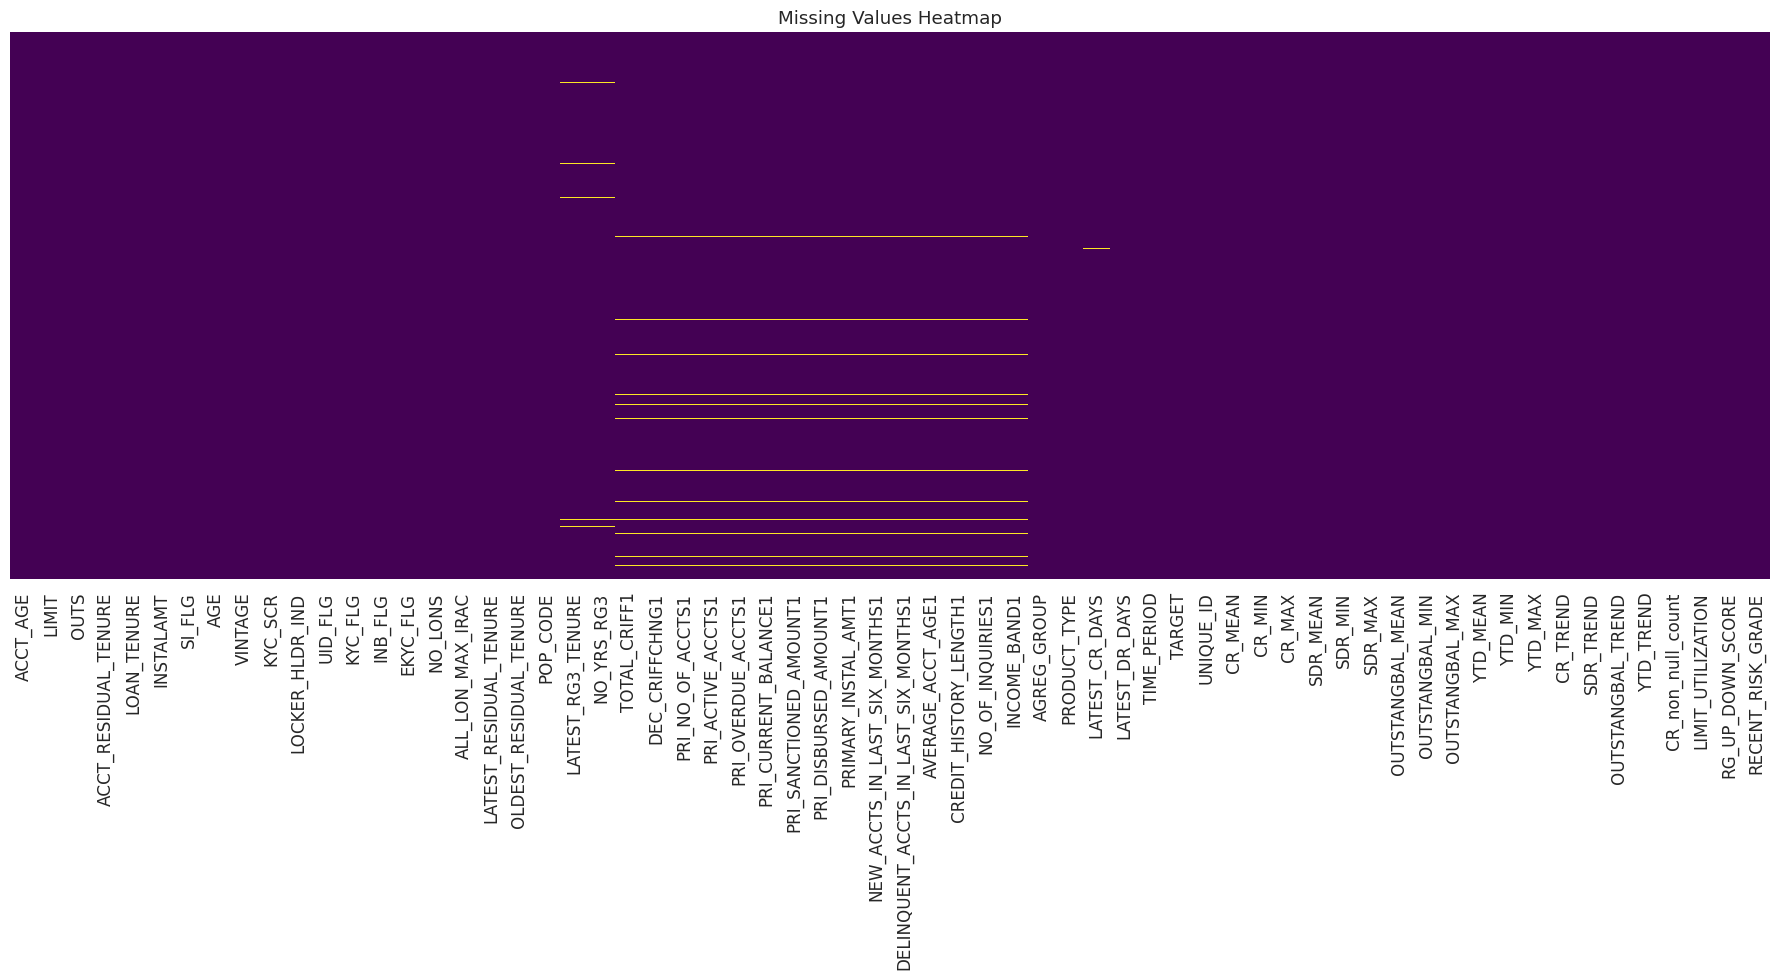

In [50]:
# Plot missing value heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Values Heatmap")
plt.tight_layout()
plt.show()

In [51]:
df.shape

(312017, 64)

In [52]:
df["TARGET"].value_counts()

TARGET
0    276577
1     35440
Name: count, dtype: int64

In [53]:
criff_related_columns = [
    "TOTAL_CRIFF1", "DEC_CRIFFCHNG1", "PRI_NO_OF_ACCTS1", "PRI_ACTIVE_ACCTS1",
    "PRI_OVERDUE_ACCTS1", "PRI_CURRENT_BALANCE1", "PRI_SANCTIONED_AMOUNT1",
    "PRI_DISBURSED_AMOUNT1", "PRIMARY_INSTAL_AMT1", "NEW_ACCTS_IN_LAST_SIX_MONTHS1",
    "DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS1", "AVERAGE_ACCT_AGE1",
    "CREDIT_HISTORY_LENGTH1", "NO_OF_INQUIRIES1", "INCOME_BAND1"
]

# Count and display missing values
df[criff_related_columns].isnull().sum()

TOTAL_CRIFF1                            5916
DEC_CRIFFCHNG1                          5916
PRI_NO_OF_ACCTS1                        5916
PRI_ACTIVE_ACCTS1                       5916
PRI_OVERDUE_ACCTS1                      5916
PRI_CURRENT_BALANCE1                    5916
PRI_SANCTIONED_AMOUNT1                  5916
PRI_DISBURSED_AMOUNT1                   5916
PRIMARY_INSTAL_AMT1                     5916
NEW_ACCTS_IN_LAST_SIX_MONTHS1           5916
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS1    5916
AVERAGE_ACCT_AGE1                       5916
CREDIT_HISTORY_LENGTH1                  5916
NO_OF_INQUIRIES1                        5916
INCOME_BAND1                            5916
dtype: int64

In [54]:
# Drop rows where all of the specified columns are missing
df = df.dropna(subset=criff_related_columns, how='all')


In [55]:
df["TARGET"].value_counts()

TARGET
0    271028
1     35073
Name: count, dtype: int64

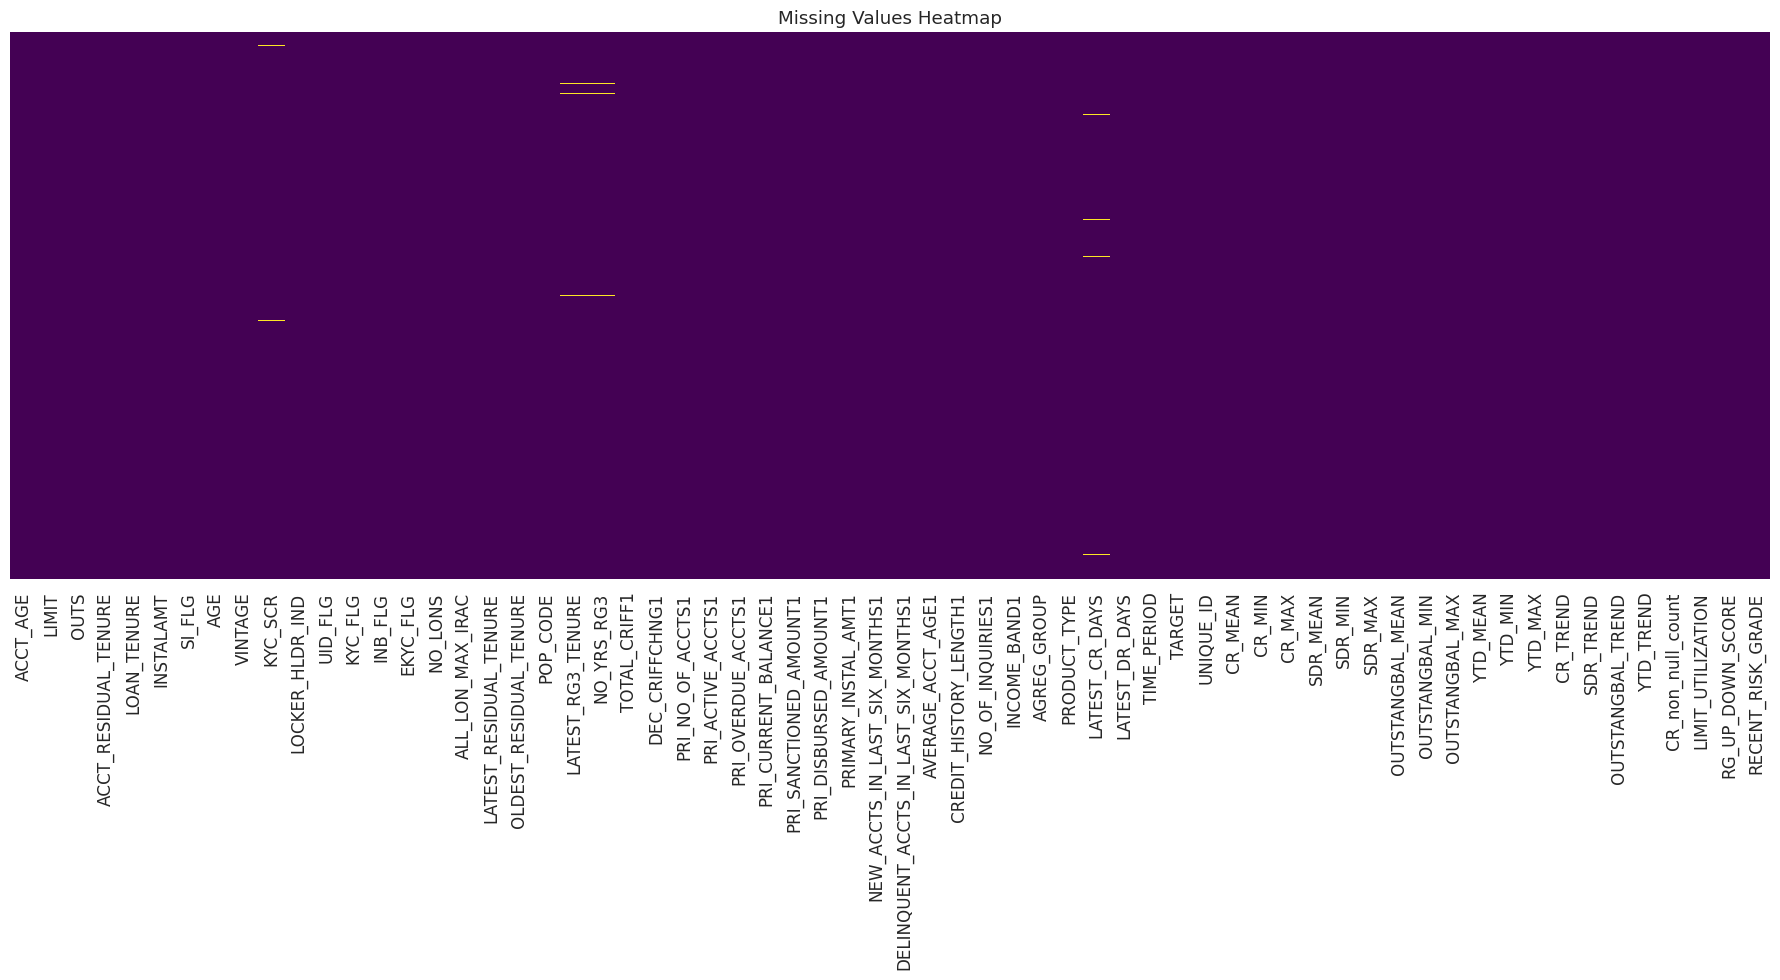

In [56]:
# Plot missing value heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Values Heatmap")
plt.tight_layout()
plt.show()

In [57]:
# Count and display missing values
df[criff_related_columns].isnull().sum()

TOTAL_CRIFF1                            0
DEC_CRIFFCHNG1                          0
PRI_NO_OF_ACCTS1                        0
PRI_ACTIVE_ACCTS1                       0
PRI_OVERDUE_ACCTS1                      0
PRI_CURRENT_BALANCE1                    0
PRI_SANCTIONED_AMOUNT1                  0
PRI_DISBURSED_AMOUNT1                   0
PRIMARY_INSTAL_AMT1                     0
NEW_ACCTS_IN_LAST_SIX_MONTHS1           0
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS1    0
AVERAGE_ACCT_AGE1                       0
CREDIT_HISTORY_LENGTH1                  0
NO_OF_INQUIRIES1                        0
INCOME_BAND1                            0
dtype: int64

In [58]:
df['PRI_OVERDUE_RATIO'] = df['PRI_OVERDUE_ACCTS1'] / df['PRI_NO_OF_ACCTS1'].replace(0, 1)
df['PRI_SANCTIONED_UTILIZATION'] = df['PRI_DISBURSED_AMOUNT1'] / df['PRI_SANCTIONED_AMOUNT1'].replace(0, 1)

In [59]:
df.drop([
    'PRI_NO_OF_ACCTS1',
    'PRI_ACTIVE_ACCTS1',
    'PRI_OVERDUE_ACCTS1',
    'PRI_SANCTIONED_AMOUNT1',
    'PRI_DISBURSED_AMOUNT1'
], axis=1, inplace=True)

In [60]:
# Create CREDIT_ACTIVITY_INDEX
df['CREDIT_ACTIVITY_INDEX'] = (
    df['NEW_ACCTS_IN_LAST_SIX_MONTHS1'] +
    df['DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS1'] +
    df['NO_OF_INQUIRIES1']
)

# Drop the original columns
df.drop(columns=[
    'NEW_ACCTS_IN_LAST_SIX_MONTHS1',
    'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS1',
    'NO_OF_INQUIRIES1'
], inplace=True)


In [61]:
df.shape

(306101, 59)

In [62]:
df.drop(columns = ["AGREG_GROUP"], inplace=True)
#similar to product type

In [63]:
df.drop(columns = ["AVERAGE_ACCT_AGE1"], inplace=True)
#similar to credit history length

In [64]:
df.drop(columns = ["UNIQUE_ID"], inplace=True)

In [65]:
df.drop(columns = ["LATEST_CR_DAYS", "LATEST_DR_DAYS", "TIME_PERIOD"], inplace=True)

In [66]:
df.drop(columns = ["NO_LONS"], inplace=True)

In [67]:
df.drop(columns = ["NO_YRS_RG3"], inplace=True)

In [68]:
df.isnull().sum()

ACCT_AGE                         0
LIMIT                            0
OUTS                             0
ACCT_RESIDUAL_TENURE            12
LOAN_TENURE                      0
INSTALAMT                        0
SI_FLG                           0
AGE                              2
VINTAGE                          2
KYC_SCR                        362
LOCKER_HLDR_IND                  2
UID_FLG                          2
KYC_FLG                          2
INB_FLG                          2
EKYC_FLG                         2
ALL_LON_MAX_IRAC                 0
LATEST_RESIDUAL_TENURE           9
OLDEST_RESIDUAL_TENURE           9
POP_CODE                         2
LATEST_RG3_TENURE             3122
TOTAL_CRIFF1                     0
DEC_CRIFFCHNG1                   0
PRI_CURRENT_BALANCE1             0
PRIMARY_INSTAL_AMT1              0
CREDIT_HISTORY_LENGTH1           0
INCOME_BAND1                     0
PRODUCT_TYPE                     0
TARGET                           0
CR_MEAN             

In [69]:
df['LATEST_RG3_TENURE'] = df['LATEST_RG3_TENURE'].fillna(df['LATEST_RG3_TENURE'].median())

# Impute POP_CODE with mode
df['POP_CODE'] = df['POP_CODE'].fillna(df['POP_CODE'].mode()[0])

# Impute LATEST_RESIDUAL_TENURE with median
df['LATEST_RESIDUAL_TENURE'] = df['LATEST_RESIDUAL_TENURE'].fillna(df['LATEST_RESIDUAL_TENURE'].median())

# Impute OLDEST_RESIDUAL_TENURE with median
df['OLDEST_RESIDUAL_TENURE'] = df['OLDEST_RESIDUAL_TENURE'].fillna(df['OLDEST_RESIDUAL_TENURE'].median())

In [70]:
df.isnull().sum()

ACCT_AGE                        0
LIMIT                           0
OUTS                            0
ACCT_RESIDUAL_TENURE           12
LOAN_TENURE                     0
INSTALAMT                       0
SI_FLG                          0
AGE                             2
VINTAGE                         2
KYC_SCR                       362
LOCKER_HLDR_IND                 2
UID_FLG                         2
KYC_FLG                         2
INB_FLG                         2
EKYC_FLG                        2
ALL_LON_MAX_IRAC                0
LATEST_RESIDUAL_TENURE          0
OLDEST_RESIDUAL_TENURE          0
POP_CODE                        0
LATEST_RG3_TENURE               0
TOTAL_CRIFF1                    0
DEC_CRIFFCHNG1                  0
PRI_CURRENT_BALANCE1            0
PRIMARY_INSTAL_AMT1             0
CREDIT_HISTORY_LENGTH1          0
INCOME_BAND1                    0
PRODUCT_TYPE                    0
TARGET                          0
CR_MEAN                         0
CR_MIN        

In [71]:
df.shape

(306101, 51)

In [72]:
df["KYC_FLG"].value_counts()

KYC_FLG
Y    305274
N       821
1         4
Name: count, dtype: int64

In [73]:
df['KYC_FLG'] = df['KYC_FLG'].replace('1', 'Y')

In [74]:
df["KYC_FLG"].value_counts()

KYC_FLG
Y    305278
N       821
Name: count, dtype: int64

In [75]:
df['EKYC_FLG'].value_counts()

EKYC_FLG
N    290597
Y     15502
Name: count, dtype: int64

In [76]:
df["TARGET"].value_counts()

TARGET
0    271028
1     35073
Name: count, dtype: int64

In [77]:
# List of columns to combine
columns_to_club = ['SI_FLG', 'LOCKER_HLDR_IND', 'UID_FLG', 'KYC_FLG', 'INB_FLG', 'EKYC_FLG']

# Convert 'Y' to 1, others to 0
df_temp = df[columns_to_club].applymap(lambda x: 1 if str(x).strip().upper() == 'Y' else 0)

# Create combined flag column: 1 if more than 2 of the flags are 'Y'
df['FLAG_COMBINED'] = (df_temp.sum(axis=1) > 2).astype(int)


In [78]:
df.shape

(306101, 52)

In [79]:
df.drop(columns = ['SI_FLG', 'LOCKER_HLDR_IND', 'UID_FLG', 'KYC_FLG', 'INB_FLG', 'EKYC_FLG'], inplace = True)

In [80]:
df.isnull().sum()

ACCT_AGE                        0
LIMIT                           0
OUTS                            0
ACCT_RESIDUAL_TENURE           12
LOAN_TENURE                     0
INSTALAMT                       0
AGE                             2
VINTAGE                         2
KYC_SCR                       362
ALL_LON_MAX_IRAC                0
LATEST_RESIDUAL_TENURE          0
OLDEST_RESIDUAL_TENURE          0
POP_CODE                        0
LATEST_RG3_TENURE               0
TOTAL_CRIFF1                    0
DEC_CRIFFCHNG1                  0
PRI_CURRENT_BALANCE1            0
PRIMARY_INSTAL_AMT1             0
CREDIT_HISTORY_LENGTH1          0
INCOME_BAND1                    0
PRODUCT_TYPE                    0
TARGET                          0
CR_MEAN                         0
CR_MIN                          0
CR_MAX                          0
SDR_MEAN                        0
SDR_MIN                         0
SDR_MAX                         0
OUTSTANGBAL_MEAN                0
OUTSTANGBAL_MI

In [81]:
df.drop(columns = ["ACCT_AGE"], inplace = True)

In [82]:
df.shape

(306101, 45)

In [83]:
df['UTILIZATION_RATIO'] = df['OUTS'] / df['LIMIT']

In [84]:
df.drop(columns = ["OUTS", "LIMIT"], inplace = True)

In [85]:
df['ACCT_RESIDUAL_TENURE'] = df['ACCT_RESIDUAL_TENURE'].fillna(df['ACCT_RESIDUAL_TENURE'].median())


In [86]:
# Convert LOAN_TENURE to years and calculate the ratio
df['TENURE_UTILIZATION_RATIO'] = df['ACCT_RESIDUAL_TENURE'] / (df['LOAN_TENURE'] / 365)
df.drop(columns = ["ACCT_RESIDUAL_TENURE", "LOAN_TENURE"], inplace = True)

In [87]:
df.isnull().sum()

INSTALAMT                       0
AGE                             2
VINTAGE                         2
KYC_SCR                       362
ALL_LON_MAX_IRAC                0
LATEST_RESIDUAL_TENURE          0
OLDEST_RESIDUAL_TENURE          0
POP_CODE                        0
LATEST_RG3_TENURE               0
TOTAL_CRIFF1                    0
DEC_CRIFFCHNG1                  0
PRI_CURRENT_BALANCE1            0
PRIMARY_INSTAL_AMT1             0
CREDIT_HISTORY_LENGTH1          0
INCOME_BAND1                    0
PRODUCT_TYPE                    0
TARGET                          0
CR_MEAN                         0
CR_MIN                          0
CR_MAX                          0
SDR_MEAN                        0
SDR_MIN                         0
SDR_MAX                         0
OUTSTANGBAL_MEAN                0
OUTSTANGBAL_MIN                 0
OUTSTANGBAL_MAX                 0
YTD_MEAN                        0
YTD_MIN                         0
YTD_MAX                         0
CR_TREND      

In [88]:
df.drop(columns = ["VINTAGE"], inplace = True)

In [89]:
# Set seed for reproducibility
np.random.seed(42)

# Get non-null KYC_SCR values
valid_kyc_values = df['KYC_SCR'].dropna().values

# Find indices where KYC_SCR is null
null_indices = df[df['KYC_SCR'].isnull()].index

# Randomly sample from existing values to fill the nulls
df.loc[null_indices, 'KYC_SCR'] = np.random.choice(valid_kyc_values, size=len(null_indices), replace=True)


In [90]:
df.isnull().sum()

INSTALAMT                     0
AGE                           2
KYC_SCR                       0
ALL_LON_MAX_IRAC              0
LATEST_RESIDUAL_TENURE        0
OLDEST_RESIDUAL_TENURE        0
POP_CODE                      0
LATEST_RG3_TENURE             0
TOTAL_CRIFF1                  0
DEC_CRIFFCHNG1                0
PRI_CURRENT_BALANCE1          0
PRIMARY_INSTAL_AMT1           0
CREDIT_HISTORY_LENGTH1        0
INCOME_BAND1                  0
PRODUCT_TYPE                  0
TARGET                        0
CR_MEAN                       0
CR_MIN                        0
CR_MAX                        0
SDR_MEAN                      0
SDR_MIN                       0
SDR_MAX                       0
OUTSTANGBAL_MEAN              0
OUTSTANGBAL_MIN               0
OUTSTANGBAL_MAX               0
YTD_MEAN                      0
YTD_MIN                       0
YTD_MAX                       0
CR_TREND                      0
SDR_TREND                     0
OUTSTANGBAL_TREND             0
YTD_TREN

In [91]:
# Impute null values in the 'age' column with the median
df['AGE'] = df['AGE'].fillna(df['AGE'].median())
df["AGE"].median()

39.005

In [92]:
df.columns

Index(['INSTALAMT', 'AGE', 'KYC_SCR', 'ALL_LON_MAX_IRAC',
       'LATEST_RESIDUAL_TENURE', 'OLDEST_RESIDUAL_TENURE', 'POP_CODE',
       'LATEST_RG3_TENURE', 'TOTAL_CRIFF1', 'DEC_CRIFFCHNG1',
       'PRI_CURRENT_BALANCE1', 'PRIMARY_INSTAL_AMT1', 'CREDIT_HISTORY_LENGTH1',
       'INCOME_BAND1', 'PRODUCT_TYPE', 'TARGET', 'CR_MEAN', 'CR_MIN', 'CR_MAX',
       'SDR_MEAN', 'SDR_MIN', 'SDR_MAX', 'OUTSTANGBAL_MEAN', 'OUTSTANGBAL_MIN',
       'OUTSTANGBAL_MAX', 'YTD_MEAN', 'YTD_MIN', 'YTD_MAX', 'CR_TREND',
       'SDR_TREND', 'OUTSTANGBAL_TREND', 'YTD_TREND', 'CR_non_null_count',
       'LIMIT_UTILIZATION', 'RG_UP_DOWN_SCORE', 'RECENT_RISK_GRADE',
       'PRI_OVERDUE_RATIO', 'PRI_SANCTIONED_UTILIZATION',
       'CREDIT_ACTIVITY_INDEX', 'FLAG_COMBINED', 'UTILIZATION_RATIO',
       'TENURE_UTILIZATION_RATIO'],
      dtype='object')

In [93]:
# Check correlation
df[['INSTALAMT', 'PRIMARY_INSTAL_AMT1']].corr()

,INSTALAMT,PRIMARY_INSTAL_AMT1
INSTALAMT,1.000000,0.192841
PRIMARY_INSTAL_AMT1,0.192841,1.000000


In [94]:
# Function to convert "Xyrs Ymon" to years as a decimal
def convert_to_years(time_str):
    # Extract years and months from the string
    years, months = 0, 0
    parts = time_str.split()  # Splits on spaces

    for part in parts:
        if 'yrs' in part:
            years = int(part.replace('yrs', '').strip())  # Remove 'yrs' and convert to int
        elif 'mon' in part:
            months = int(part.replace('mon', '').strip())  # Remove 'mon' and convert to int

    # Convert months to years and sum up with years
    return years + months / 12

# Apply this function to the 'CREDIT_HISTORY_LENGTH1' column
df['CREDIT_HISTORY_LENGTH1'] = df['CREDIT_HISTORY_LENGTH1'].apply(convert_to_years)

# Check the output
df['CREDIT_HISTORY_LENGTH1']


0          7.500000
1          7.500000
2          7.500000
3         10.666667
4         10.666667
            ...    
312011     8.083333
312012    13.583333
312013     4.083333
312015     1.166667
312016    10.666667
Name: CREDIT_HISTORY_LENGTH1, Length: 306101, dtype: float64

In [95]:
df["INCOME_BAND1"].value_counts()

INCOME_BAND1
F       102041
D        52748
G        48090
E        32832
H        32296
C        17953
EX05     11564
B         8464
EX02        36
EX04        31
A           27
EX01        19
Name: count, dtype: int64

In [96]:
df["RG_UP_DOWN_SCORE"].describe()

count    306101.000000
mean          3.495735
std           2.330143
min          -4.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          57.000000
Name: RG_UP_DOWN_SCORE, dtype: float64

In [97]:
df["PRODUCT_TYPE"].value_counts()

PRODUCT_TYPE
PERSONAL LOAN     160960
HOME LOAN          85114
AUTO LOAN          36937
EDUCATION LOAN     23090
Name: count, dtype: int64

In [98]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['PRODUCT_TYPE'] = le.fit_transform(df['PRODUCT_TYPE'])


In [99]:
df.dtypes

INSTALAMT                     float64
AGE                           float64
KYC_SCR                       float64
ALL_LON_MAX_IRAC                int64
LATEST_RESIDUAL_TENURE        float64
OLDEST_RESIDUAL_TENURE        float64
POP_CODE                      float64
LATEST_RG3_TENURE             float64
TOTAL_CRIFF1                  float64
DEC_CRIFFCHNG1                float64
PRI_CURRENT_BALANCE1          float64
PRIMARY_INSTAL_AMT1           float64
CREDIT_HISTORY_LENGTH1        float64
INCOME_BAND1                   object
PRODUCT_TYPE                    int64
TARGET                          int64
CR_MEAN                       float64
CR_MIN                        float64
CR_MAX                        float64
SDR_MEAN                      float64
SDR_MIN                       float64
SDR_MAX                       float64
OUTSTANGBAL_MEAN              float64
OUTSTANGBAL_MIN               float64
OUTSTANGBAL_MAX               float64
YTD_MEAN                      float64
YTD_MIN     

In [100]:
df.shape

(306101, 42)

In [101]:
df.isnull().sum()

INSTALAMT                     0
AGE                           0
KYC_SCR                       0
ALL_LON_MAX_IRAC              0
LATEST_RESIDUAL_TENURE        0
OLDEST_RESIDUAL_TENURE        0
POP_CODE                      0
LATEST_RG3_TENURE             0
TOTAL_CRIFF1                  0
DEC_CRIFFCHNG1                0
PRI_CURRENT_BALANCE1          0
PRIMARY_INSTAL_AMT1           0
CREDIT_HISTORY_LENGTH1        0
INCOME_BAND1                  0
PRODUCT_TYPE                  0
TARGET                        0
CR_MEAN                       0
CR_MIN                        0
CR_MAX                        0
SDR_MEAN                      0
SDR_MIN                       0
SDR_MAX                       0
OUTSTANGBAL_MEAN              0
OUTSTANGBAL_MIN               0
OUTSTANGBAL_MAX               0
YTD_MEAN                      0
YTD_MIN                       0
YTD_MAX                       0
CR_TREND                      0
SDR_TREND                     0
OUTSTANGBAL_TREND             0
YTD_TREN

In [102]:
df["TARGET"].value_counts()

TARGET
0    271028
1     35073
Name: count, dtype: int64

In [103]:
from sklearn.preprocessing import LabelEncoder

# Combine income bands
def clean_income_band(value):
    value = str(value).strip().upper()
    if value in ['A', 'B']:
        return 'A_B'
    elif value.startswith('EX'):
        return 'EX'
    else:
        return value

# Apply the transformation
df['INCOME_BAND1_CLEANED'] = df['INCOME_BAND1'].apply(clean_income_band)

# Label encode
le = LabelEncoder()
df['INCOME_BAND1_ENCODED'] = le.fit_transform(df['INCOME_BAND1_CLEANED'])


In [104]:
df['INCOME_BAND1_ENCODED'].value_counts()

INCOME_BAND1_ENCODED
5    102041
2     52748
6     48090
3     32832
7     32296
1     17953
4     11650
0      8491
Name: count, dtype: int64

In [105]:
df.dtypes

INSTALAMT                     float64
AGE                           float64
KYC_SCR                       float64
ALL_LON_MAX_IRAC                int64
LATEST_RESIDUAL_TENURE        float64
OLDEST_RESIDUAL_TENURE        float64
POP_CODE                      float64
LATEST_RG3_TENURE             float64
TOTAL_CRIFF1                  float64
DEC_CRIFFCHNG1                float64
PRI_CURRENT_BALANCE1          float64
PRIMARY_INSTAL_AMT1           float64
CREDIT_HISTORY_LENGTH1        float64
INCOME_BAND1                   object
PRODUCT_TYPE                    int64
TARGET                          int64
CR_MEAN                       float64
CR_MIN                        float64
CR_MAX                        float64
SDR_MEAN                      float64
SDR_MIN                       float64
SDR_MAX                       float64
OUTSTANGBAL_MEAN              float64
OUTSTANGBAL_MIN               float64
OUTSTANGBAL_MAX               float64
YTD_MEAN                      float64
YTD_MIN     

In [106]:
df.drop(columns = ["INCOME_BAND1", "INCOME_BAND1_CLEANED"], inplace = True )

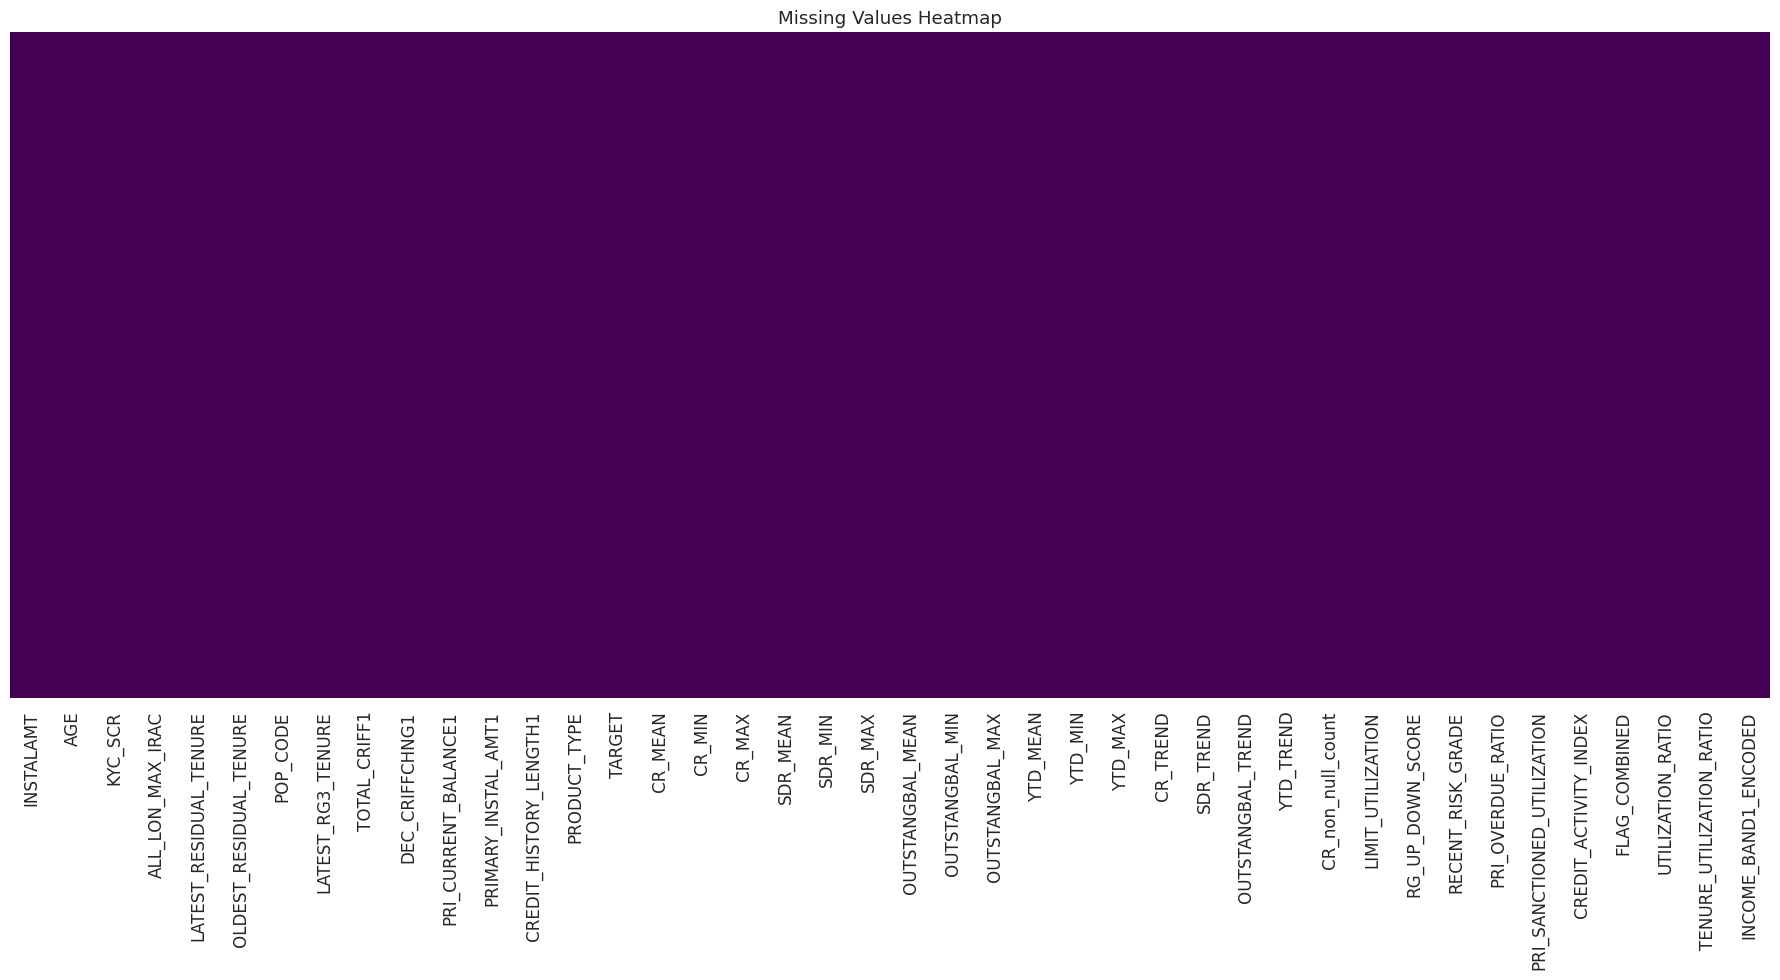

In [107]:
# Plot missing value heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Values Heatmap")
plt.tight_layout()
plt.show()

In [108]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from collections import Counter

In [109]:
X = df.drop('TARGET', axis=1)
y = df['TARGET']


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=42)


In [111]:
# smote_tomek = SMOTETomek(random_state=42)
# X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)


In [112]:
smk = SMOTETomek(sampling_strategy=0.7, random_state=42)
X_res, y_res = smk.fit_resample(X_train, y_train)

print('Original training set:', Counter(y_train))
print('Resampled training set:', Counter(y_res))

Original training set: Counter({0: 216822, 1: 28058})
Resampled training set: Counter({0: 213518, 1: 148471})


In [113]:
print("Before resampling:", Counter(y_train))
print("After resampling:", Counter(y_res))


Before resampling: Counter({0: 216822, 1: 28058})
After resampling: Counter({0: 213518, 1: 148471})


In [114]:
y_test.value_counts()

TARGET
0    54206
1     7015
Name: count, dtype: int64

In [115]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, precision_recall_curve, auc


In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, precision_recall_curve, auc

In [117]:
# models = {
#     "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
#     "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
#     "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
#     "XGBoost": XGBClassifier(scale_pos_weight=9, use_label_encoder=False, eval_metric='logloss', random_state=42)
# }


In [118]:
# Compute scale_pos_weight for XGBoost
scale_pos_weight = Counter(y_train)[0] / Counter(y_train)[1]

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(
        n_estimators=500, max_depth=10,
        class_weight='balanced', n_jobs=-1, random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=500, max_depth=6, learning_rate=0.1,
        scale_pos_weight=scale_pos_weight,
        use_label_encoder=False, eval_metric='aucpr',
        n_jobs=-1, random_state=42
    ),
    "LightGBM": LGBMClassifier(
        n_estimators=500, max_depth=10, learning_rate=0.1,
        class_weight='balanced', n_jobs=-1, random_state=42
    )
}

In [119]:
for name, model in models.items():
    print(f"\n===== Training {name} =====")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict probabilities and labels
    y_scores = model.predict_proba(X_test)[:, 1]  # Probabilities for minority class
    y_pred = (y_scores >= 0.6).astype(int) 
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=4))
    
    # F1 score
    f1 = f1_score(y_test, y_pred)
    print(f"F1 Score (threshold=0.6): {f1:.4f}")
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)
    
    # AUC-PR
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    pr_auc = auc(recall, precision)
    print(f"AUC-PR: {pr_auc:.4f}")


===== Training Decision Tree =====

Classification Report:
              precision    recall  f1-score   support

           0     0.9072    0.9117    0.9094     54206
           1     0.2904    0.2791    0.2846      7015

    accuracy                         0.8392     61221
   macro avg     0.5988    0.5954    0.5970     61221
weighted avg     0.8365    0.8392    0.8379     61221

F1 Score (threshold=0.6): 0.2846

Confusion Matrix:
[[49421  4785]
 [ 5057  1958]]
AUC-PR: 0.3260

===== Training Random Forest =====

Classification Report:
              precision    recall  f1-score   support

           0     0.9361    0.8538    0.8930     54206
           1     0.3272    0.5494    0.4101      7015

    accuracy                         0.8189     61221
   macro avg     0.6316    0.7016    0.6516     61221
weighted avg     0.8663    0.8189    0.8377     61221

F1 Score (threshold=0.6): 0.4101

Confusion Matrix:
[[46280  7926]
 [ 3161  3854]]
AUC-PR: 0.4045

===== Training XGBoost =====


### **GridSearchCV for `XGBoost` model (performs the best on the data)**

In [120]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Compute scale_pos_weight based on imbalance ratio
neg, pos = y_train.value_counts()
scale_pos_weight = neg / pos   # useful for imbalanced data

param_grid_xgb = {
    "max_depth": [4, 6],
    "learning_rate": [0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8],
    "gamma": [0, 1],
    "reg_lambda": [1, 5],
    "reg_alpha": [0, 1],
    "scale_pos_weight": [scale_pos_weight],
}

xgb_model = XGBClassifier(
        n_estimators=500, max_depth=6, learning_rate=0.1,
        scale_pos_weight=scale_pos_weight,
        use_label_encoder=False, eval_metric='aucpr',
        n_jobs=-1, random_state=42
    )

grid_xgb = GridSearchCV(
    xgb_model,
    param_grid_xgb,
    scoring='f1',  # same scoring as LGBM grid
    cv=3,
    verbose=1
)

grid_xgb.fit(X_train, y_train)

print("Best Score:", grid_xgb.best_score_)
print("Best Params:", grid_xgb.best_params_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best Score: 0.42490376008354375
Best Params: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 6, 'reg_alpha': 1, 'reg_lambda': 5, 'scale_pos_weight': 7.727635611946682, 'subsample': 0.8}


**Prediction on `XGBoost` after performing hyperparameter tuning through `GridSearchCV`**

In [122]:
from sklearn.metrics import (
    classification_report, confusion_matrix,
    average_precision_score, roc_auc_score,
    precision_recall_curve
)

# 1️⃣ Get best model from GridSearch
best_xgb = grid_xgb.best_estimator_

# 2️⃣ Predict on test set
y_pred = best_xgb.predict(X_test)
y_prob = best_xgb.predict_proba(X_test)[:, 1]   # probabilities for positive class

# 3️⃣ Metrics
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Average Precision (AUPRC)
ap = average_precision_score(y_test, y_prob)
print(f"\nAUPRC (Average Precision): {ap:.4f}")

# ROC-AUC
roc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC: {roc:.4f}")

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.79      0.86     54206
           1       0.30      0.69      0.42      7015

    accuracy                           0.78     61221
   macro avg       0.63      0.74      0.64     61221
weighted avg       0.88      0.78      0.81     61221


Confusion Matrix:
[[42839 11367]
 [ 2158  4857]]

AUPRC (Average Precision): 0.4588
ROC-AUC: 0.8245


In [123]:
from sklearn.metrics import precision_recall_curve, classification_report

y_scores = model.predict_proba(X_test)[:,1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

import numpy as np
best_idx = np.argmax(precisions * recalls)  # or F1, or custom metric
best_threshold = thresholds[best_idx]
print("Best threshold:", best_threshold)

Best threshold: 0.5781025519106622


### **SHAP for Explainability**

**SHAP for tuned model**

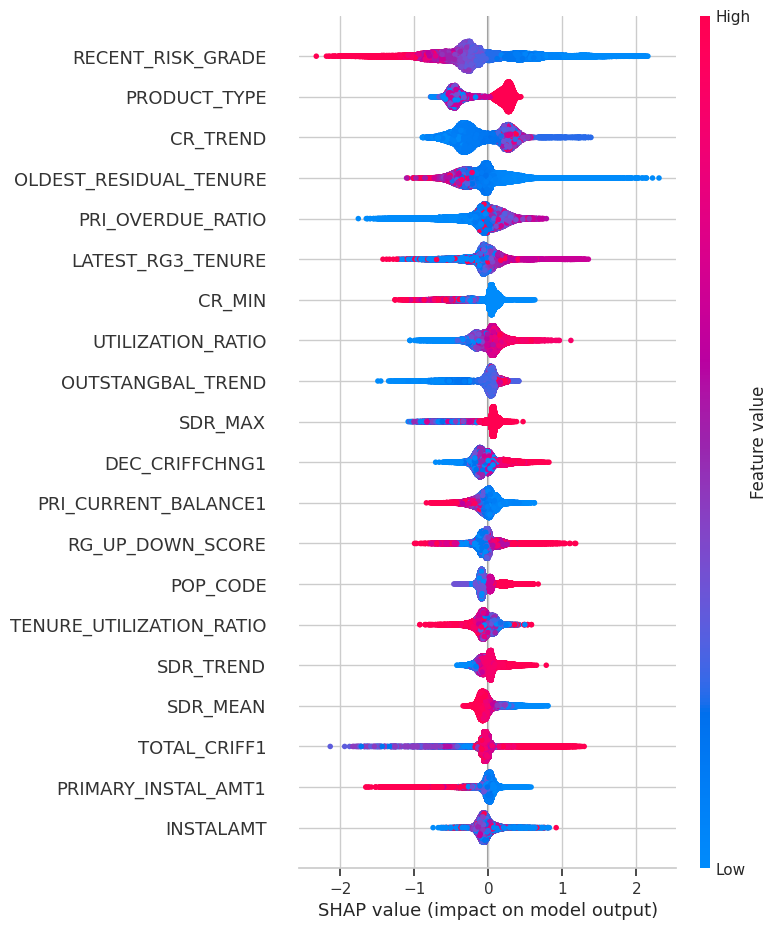

In [125]:
import shap

best_model = best_xgb
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Global feature importance
shap.summary_plot(shap_values, X_test)

# Local explanation of first sample
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])
